In [1]:
import uproot 
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
from iminuit import Minuit
import matplotlib.cm as cm
from matplotlib.patches import Patch
from iminuit import Minuit
from scipy.optimize import curve_fit
import bened as ben

# GAMMA XDVR

## CARICAMENTO DATI DA FILE E DIVISIONE CANALI

In [2]:
#giorno2
americio = uproot.open('group23\\10min-americio-gr23\\RAW\\DataR_10min-americio-gr23.root')
sodio = uproot.open('group23\\10min-sodio-gr23-SOGLIA\\RAW\\DataR_10min-sodio-gr23-SOGLIA.root')
europio = uproot.open('group23\\20min-europio-gr23\\RAW\\DataR_20min-europio-gr23.root')
back2 = uproot.open('group23\\30min-background-gr23\\RAW\\DataR_30min-background-gr23.root')
#giorno3
autunite = uproot.open('group23\\15min-autunite-gr23\\RAW\\DataR_15min-autunite-gr23.root')
enea = uproot.open('group23\\15min-Enea-water-gr23\\RAW\\DataR_15min-Enea-water-gr23.root')
porcini = uproot.open('group23\\15min-porcini-mushrooms-gr23\\RAW\\DataR_15min-porcini-mushrooms-gr23.root')
cement = uproot.open('group23\\15min-portland-cement-gr23\\RAW\\DataR_15min-portland-cement-gr23.root')
potassio = uproot.open('group23\\15min-potassio-gr23\\RAW\\DataR_15min-potassio-gr23.root')
zirconio = uproot.open('group23\\15min-zirconium-oxide-gr23\\RAW\\DataR_15min-zirconium-oxide-gr23.root')
back3 = uproot.open('group23\\15min-background-gr23-giorno3\\RAW\\DataR_15min-background-gr23.root')
#radon
exposed = uproot.open('group23\\30min-exposed-radon-gr23\\RAW\\DataR_30min-exposed-radon-gr23.root')
unexposed =uproot.open('group23\\30min-non-exposed-radon-gr23\\RAW\\DataR_30min-non-exposed-radon-gr23.root')
calibrated = uproot.open('group23\\30min-calibrated-radon-gr23\\RAW\\DataR_30min-calibrated-radon-gr23.root')

In [3]:
energy_americio = np.asarray(americio['Data_R;3']['Energy'].array(), dtype=np.float64)
canaliAM = np.asarray(americio['Data_R;3']['Channel'].array(), dtype=np.int64)

energy_sodio = np.asarray(sodio['Data_R;6']['Energy'].array(), dtype=np.float64)
canaliNA = np.asarray(sodio['Data_R;6']['Channel'].array(), dtype=np.int64)

energy_europio = np.asarray(europio['Data_R;6']['Energy'].array(), dtype=np.float64)
canaliEU = np.asarray(europio['Data_R;6']['Channel'].array(), dtype=np.int64)

energy_autunite = np.asarray(autunite['Data_R;4']['Energy'].array(), dtype=np.float64)
canaliAUT = np.asarray(autunite['Data_R;4']['Channel'].array(), dtype=np.int64)

energy_enea = np.asarray(enea['Data_R;4']['Energy'].array(), dtype=np.float64)
canaliENEA = np.asarray(enea['Data_R;4']['Channel'].array(), dtype=np.int64)

energy_porcini = np.asarray(porcini['Data_R;4']['Energy'].array(), dtype=np.float64)
canaliPORCINI = np.asarray(porcini['Data_R;4']['Channel'].array(), dtype=np.int64)

energy_cement = np.asarray(cement['Data_R;5']['Energy'].array(), dtype=np.float64)
canaliCEMENTO = np.asarray(cement['Data_R;5']['Channel'].array(), dtype=np.int64)

energy_potassio = np.asarray(potassio['Data_R;4']['Energy'].array(), dtype=np.float64)
canaliPOTASSIO = np.asarray(potassio['Data_R;4']['Channel'].array(), dtype=np.int64)

energy_zirconio = np.asarray(zirconio['Data_R;5']['Energy'].array(), dtype=np.float64)
canaliZIRCONIO = np.asarray(zirconio['Data_R;5']['Channel'].array(), dtype=np.int64)

fondo2giorno = np.asarray(back2['Data_R;4']['Energy'].array(), dtype=np.float64)
canaliback2 = np.asarray(back2['Data_R;4']['Channel'].array(), dtype=np.int64)

fondo3giorno = np.asarray(back3['Data_R;5']['Energy'].array(), dtype=np.float64)
canaliback3 = np.asarray(back3['Data_R;5']['Channel'].array(), dtype=np.int64)

energy_exposed = np.asarray(exposed['Data_R;9']['Energy'].array(), dtype=np.float64)
canaliexp = np.asarray(exposed['Data_R;9']['Channel'].array(), dtype=np.int64)

energy_unexposed = np.asarray(unexposed['Data_R;9']['Energy'].array(), dtype=np.float64)
canaliunexp = np.asarray(unexposed['Data_R;9']['Channel'].array(), dtype=np.int64)

energy_calibrated = np.asarray(calibrated['Data_R;9']['Energy'].array(), dtype=np.float64)
canalical = np.asarray(calibrated['Data_R;9']['Channel'].array(), dtype=np.int64)

In [4]:
# Separa i dati in due array distinti per ogni canale (0 e 1)
americio_ch0 = energy_americio[canaliAM == 0]
americio_ch1 = energy_americio[canaliAM == 1]

sodio_ch0 = energy_sodio[canaliNA == 0]
sodio_ch1 = energy_sodio[canaliNA == 1]

europio_ch0 = energy_europio[canaliEU == 0]
europio_ch1 = energy_europio[canaliEU == 1]

autunite_ch0 = energy_autunite[canaliAUT == 0]
autunite_ch1 = energy_autunite[canaliAUT == 1]

enea_ch0 = energy_enea[canaliENEA == 0]
enea_ch1 = energy_enea[canaliENEA == 1]

porcini_ch0 = energy_porcini[canaliPORCINI == 0]
porcini_ch1 = energy_porcini[canaliPORCINI == 1]

cemento_ch0 = energy_cement[canaliCEMENTO == 0]
cemento_ch1 = energy_cement[canaliCEMENTO == 1]

potassio_ch0 = energy_potassio[canaliPOTASSIO == 0]
potassio_ch1 = energy_potassio[canaliPOTASSIO == 1]

zirconio_ch0 = energy_zirconio[canaliZIRCONIO == 0]
zirconio_ch1 = energy_zirconio[canaliZIRCONIO == 1]

fondo2_ch0 = fondo2giorno[canaliback2 == 0]
fondo2_ch1 = fondo2giorno[canaliback2 == 1]

fondo3_ch0 = fondo3giorno[canaliback3 == 0]
fondo3_ch1 = fondo3giorno[canaliback3 == 1]

exposed_ch0 = energy_exposed[canaliexp == 0]
exposed_ch1 = energy_exposed[canaliexp == 1]

unexposed_ch0 = energy_unexposed[canaliunexp == 0]
unexposed_ch1 = energy_unexposed[canaliunexp == 1]

calibrated_ch0 = energy_calibrated[canalical == 0]
calibrated_ch1 = energy_calibrated[canalical == 1]

## ENERGY CALIBRATION

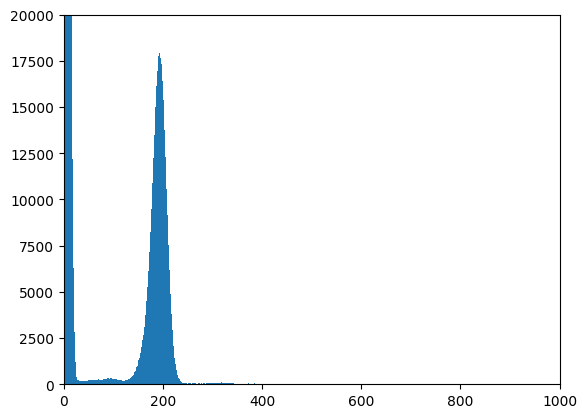

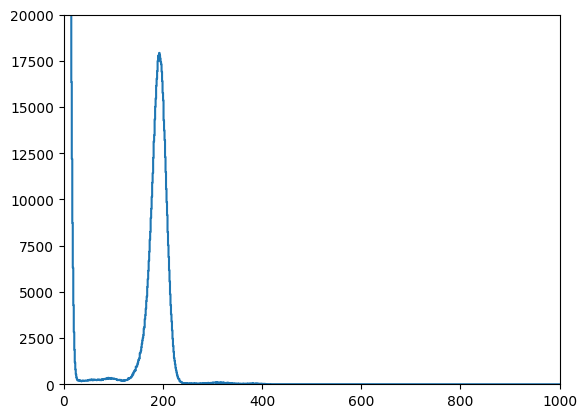

In [5]:
b=int(americio_ch0.max())
plt.hist(americio_ch0, bins=b)
plt.ylim(0, 20000)
plt.xlim(0, 1000)
plt.show()

counts, bin_edges = np.histogram(americio_ch0, bins=b, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.step(bin_centers, counts)
plt.xlim(0, 1000)
plt.ylim(0, 20000)
plt.show()

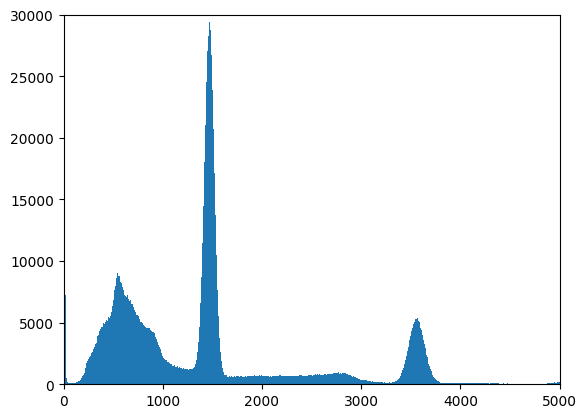

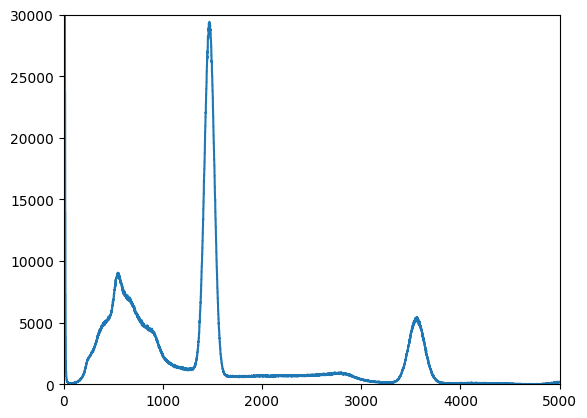

In [6]:
b=int(sodio_ch0.max())
plt.hist(sodio_ch0, bins=b)
plt.ylim(0, 30000)
plt.xlim(0, 5000)
plt.show()

counts, bin_edges = np.histogram(sodio_ch0, bins=b, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.step(bin_centers, counts)
plt.xlim(0, 5000)
plt.ylim(0, 30000)
plt.show()

### background e picchi

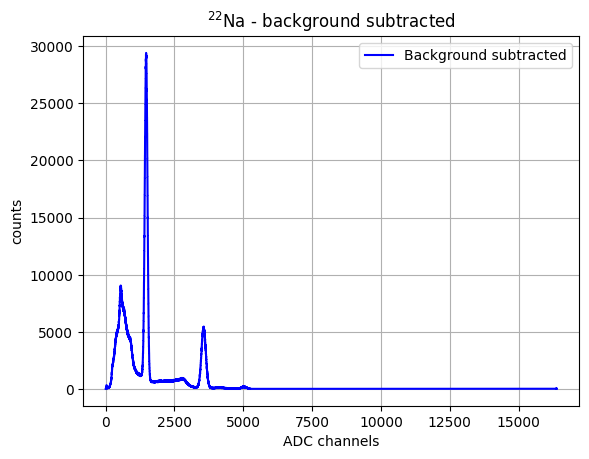

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 3697540.54636566 ± 4780.387316848829
Media = 1469.7140240992871 ± 0.0753701305588071
Sigma = 50.82980298739661 ± 0.07687536497353165
Chi-quadro = 3895.450989216009
Chi-quadro ridotto = 15.771056636502061
Integrale dell'istogramma nel range [1368.0544181244938, 1571.3736300740804] = 3523750


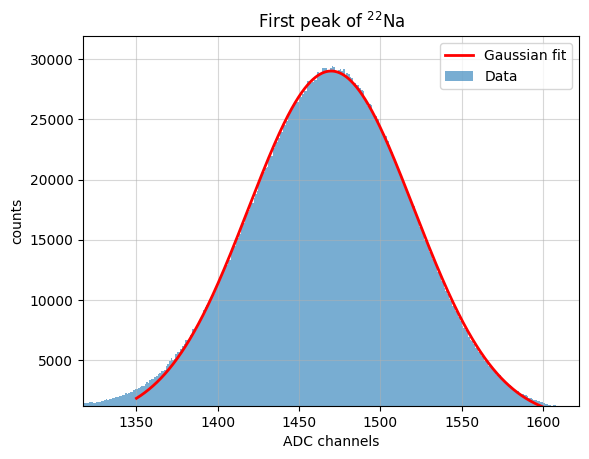

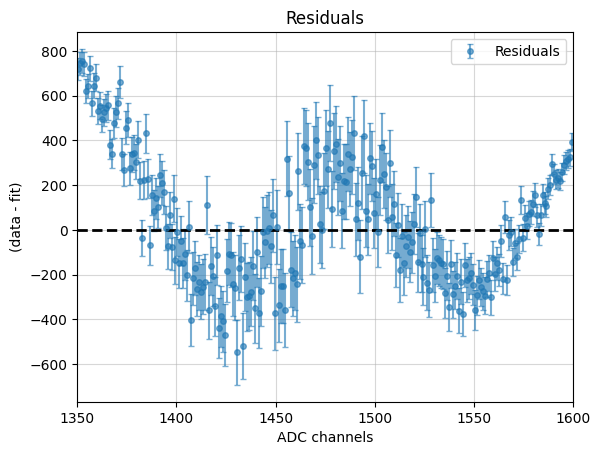

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 1070699.0896962592 ± 1446.932123584376
Media = 3559.824076266031 ± 0.1265596219708771
Sigma = 81.14238443964994 ± 0.12673611221669107
Chi-quadro = 4451.403844810062
Chi-quadro ridotto = 8.956546971448816
Integrale dell'istogramma nel range [3397.5393073867313, 3722.108845145331] = 1019322


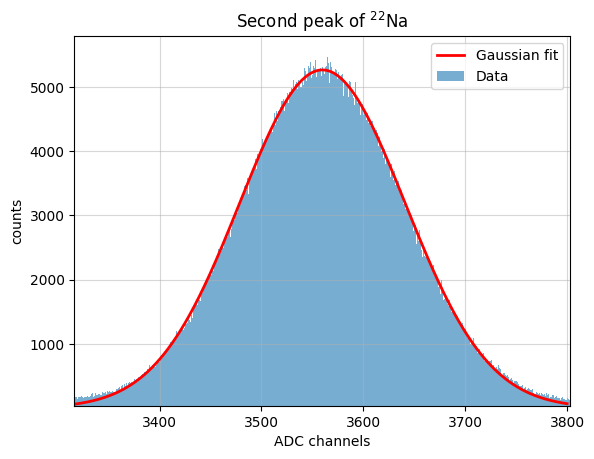

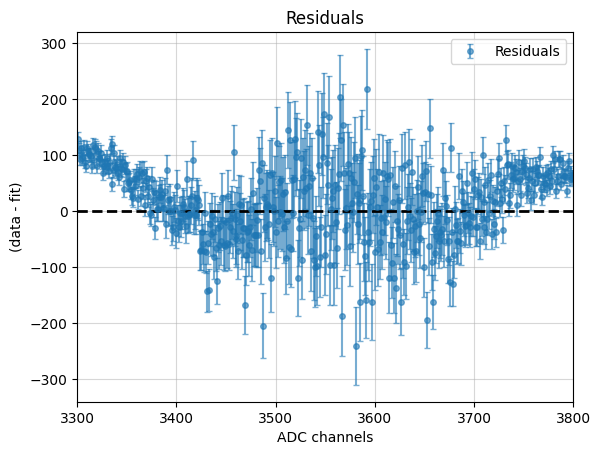

In [7]:
bin_sodio_ch0_corr, hist_sodio_ch0_corr = ben.background(sodio_ch0, fondo2_ch0, None, 'ADC channels', 'counts', '$^{22}$Na - background subtracted')
sodioch0_peak1 = ben.normal(bin_centers=bin_sodio_ch0_corr, counts=hist_sodio_ch0_corr, xlabel='ADC channels', ylabel='counts', titolo='First peak of $^{22}$Na', xmin=1350, xmax=1600,  n=2)
sodioch0_peak2 = ben.normal(bin_centers=bin_sodio_ch0_corr, counts=hist_sodio_ch0_corr, xlabel='ADC channels', ylabel='counts', titolo='Second peak of $^{22}$Na', xmin=3300, xmax=3800, n=2)

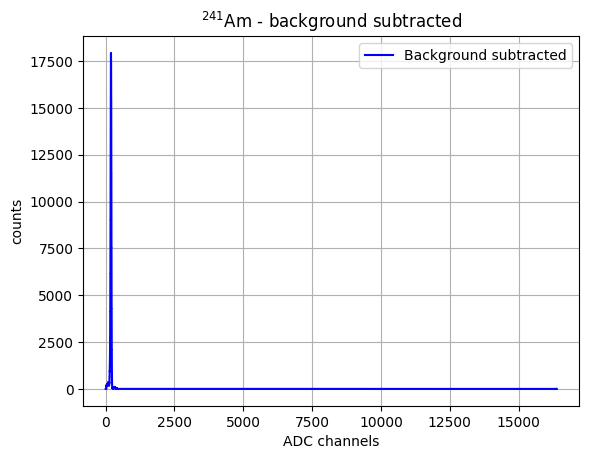

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 611265.8588369272 ± 1292.166211368053
Media = 193.59605381002555 ± 0.03210712039128444
Sigma = 13.619600912786256 ± 0.034822282058693706
Chi-quadro = 391.6391245845033
Chi-quadro ridotto = 5.845360068425422
Integrale dell'istogramma nel range [166.35685198445304, 220.83525563559806] = 600678


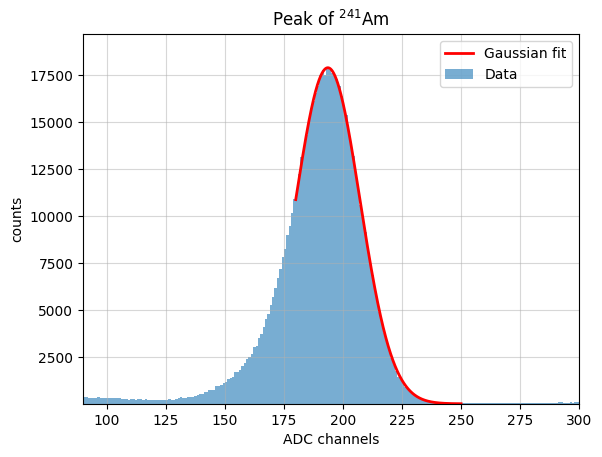

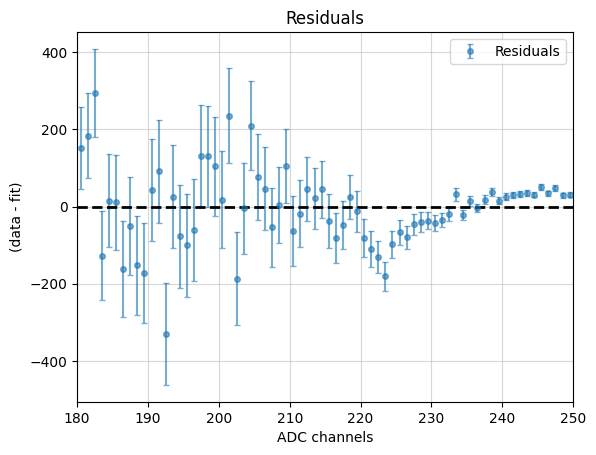

In [8]:
bin_americio_ch0_corr, hist_americio_ch0_corr = ben.background(americio_ch0, fondo2_ch0, None, 'ADC channels', 'counts', '$^{241}$Am - background subtracted')
americioch0_peak = ben.normal(bin_centers=bin_americio_ch0_corr, counts=hist_americio_ch0_corr, xlabel='ADC channels', ylabel='counts', titolo='Peak of $^{241}$Am', xmin=180, xmax=250, x1=90, x2=300, n=2)

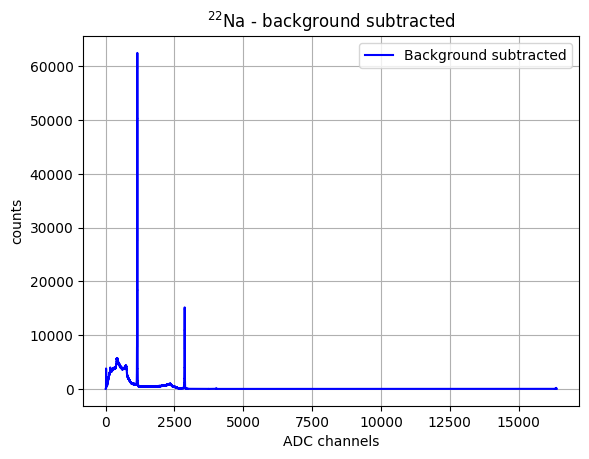

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 836679.8714480074 ± 6553.949955407284
Media = 1150.1190739811584 ± 0.048917544498720225
Sigma = 5.408240035526738 ± 0.0489190199147417
Chi-quadro = 16561.949693705774
Chi-quadro ridotto = 447.6202619920479
Integrale dell'istogramma nel range [1139.3025939101049, 1160.935554052212] = 798039


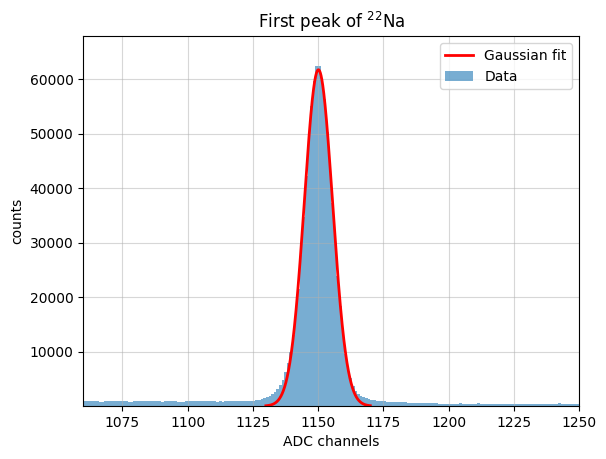

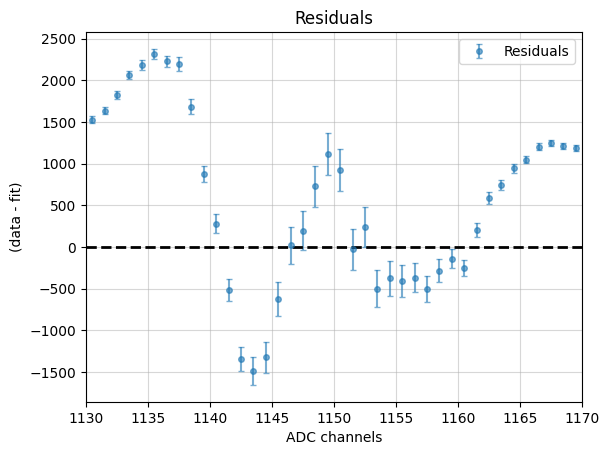

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 190978.337758391 ± 956.4559050421302
Media = 2870.587831088693 ± 0.02835126844172582
Sigma = 5.034503968167342 ± 0.030560946475005107
Chi-quadro = 132.4776789580772
Chi-quadro ridotto = 6.6238839479038605
Integrale dell'istogramma nel range [2860.518823152358, 2880.6568390250277] = 182925


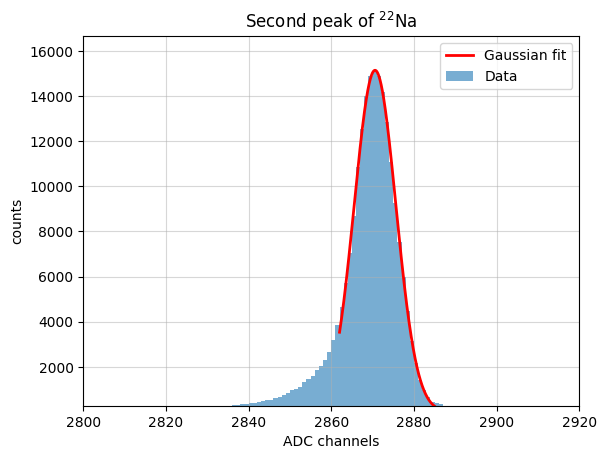

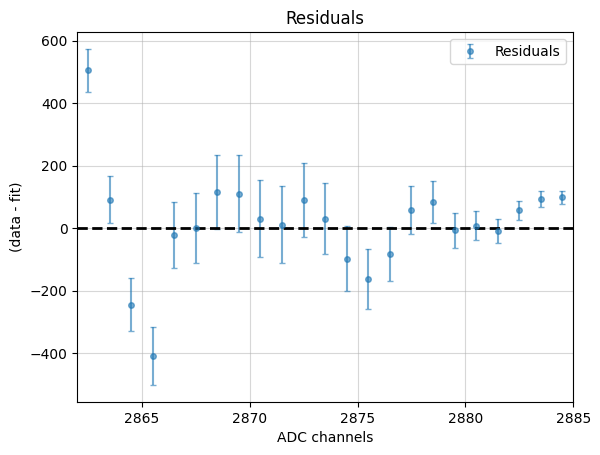

In [9]:
bin_sodio_ch1_corr, hist_sodio_ch1_corr = ben.background(sodio_ch1, fondo2_ch1, None, 'ADC channels', 'counts', '$^{22}$Na - background subtracted')
sodioch1_peak1 = ben.normal(bin_centers=bin_sodio_ch1_corr, counts=hist_sodio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='First peak of $^{22}$Na', xmin=1130, xmax=1170, x1=1060, x2=1250, n=2)
sodioch1_peak2 = ben.normal(bin_centers=bin_sodio_ch1_corr, counts=hist_sodio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='Second peak of $^{22}$Na', xmin=2862, xmax=2885, x1=2800, x2=2920, n=2)

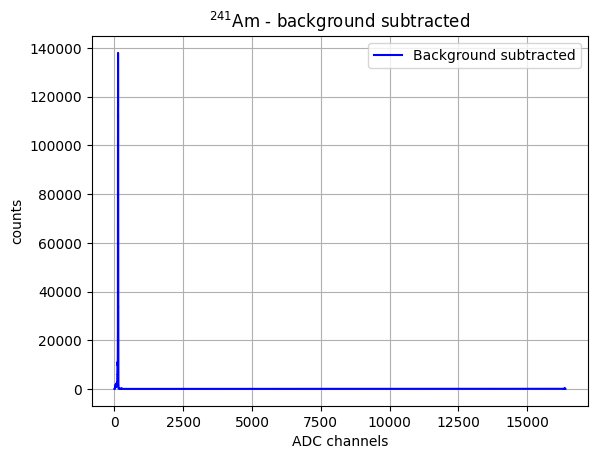

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 1438184.809264865 ± 18611.312264671797
Media = 133.22961278832653 ± 0.06285022099686503
Sigma = 4.206616314783794 ± 0.06287530915860237
Chi-quadro = 20578.994281607636
Chi-quadro ridotto = 762.1849733928755
Integrale dell'istogramma nel range [124.81638015875895, 141.64284541789414] = 1372091


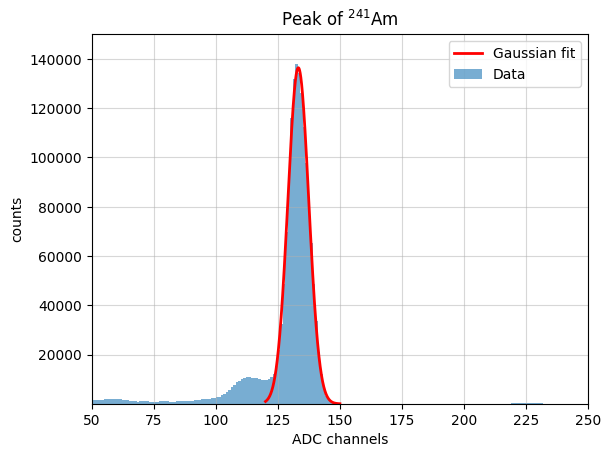

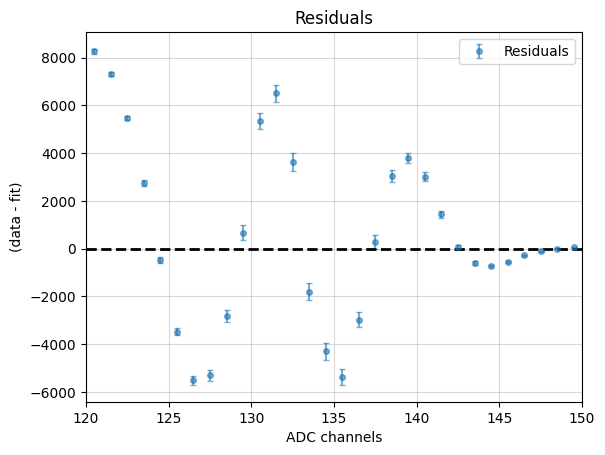

In [10]:
bin_americio_ch1_corr, hist_americio_ch1_corr = ben.background(americio_ch1, fondo2_ch1, None, 'ADC channels', 'counts', '$^{241}$Am - background subtracted')
americioch0_peak = ben.normal(bin_centers=bin_americio_ch1_corr, counts=hist_americio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='Peak of $^{241}$Am', xmin=120, xmax=150, x1=50, x2=250, n=2)

### cella di calibrazione

In [11]:
known_energies=np.array([511, 1274.54, 59.54])

ADC_ch0 = np.array([1469.822779, 3559.824076, 193.5960538])
sigma_ADC_ch0 = np.array([0.06195962621, 0.126559622, 0.03210712039])

ADC_ch1 = np.array([1150.119059, 2870.587831, 133.2296128])
sigma_ADC_ch1 = np.array([0.04778742868, 0.02835126844, 0.062850221])

In [12]:
print('NAI')
calibrazione_ch0 = ben.linear_regression(x=ADC_ch0, y=known_energies, sx=sigma_ADC_ch0, xlabel='ADC channels', ylabel='Theoretical energy [KeV]', titolo='Calibration fit of NaI(Tl)')
print('__________________________________________________\nHPGE')
calibrazione_ch1 = ben.linear_regression(x=ADC_ch1, y=known_energies, sx=sigma_ADC_ch1, xlabel='ADC channels', ylabel='Theoretical energy [KeV]', titolo='Calibration fit of HPGe')

NAI
Parametri ottimizzati:
-----------------------------------------------
Inclinazione (m) = 0.3586726295147739 ± 3.325924117807295e-05
Intercetta (q) = -10.796080596613754 ± 0.0344878846738197
Chi-squared = 12885.150979807393
Reduced chi-squared = 12885.150979807393
__________________________________________________
HPGE
Parametri ottimizzati:
-----------------------------------------------
Inclinazione (m) = 0.4438374481585683 ± 2.175945408741927e-05
Intercetta (q) = 0.4735398622338386 ± 0.05148889989763432
Chi-squared = 2.780665531480684
Reduced chi-squared = 2.780665531480684


In [13]:
picco_am = ADC_ch1[2]*calibrazione_ch1[0]+calibrazione_ch1[1]
print(f'picco americio nell hpge:{picco_am}')

picco americio nell hpge:59.60583122653997


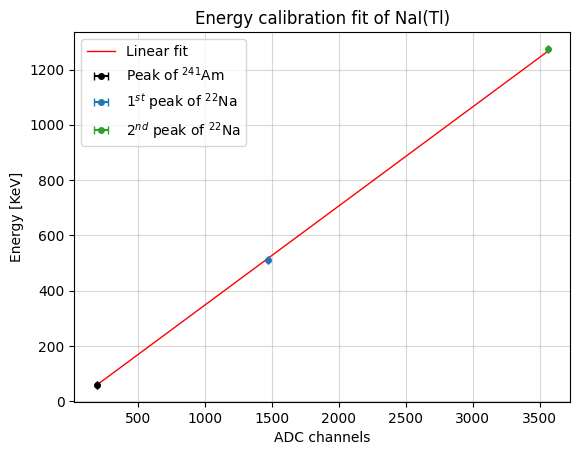

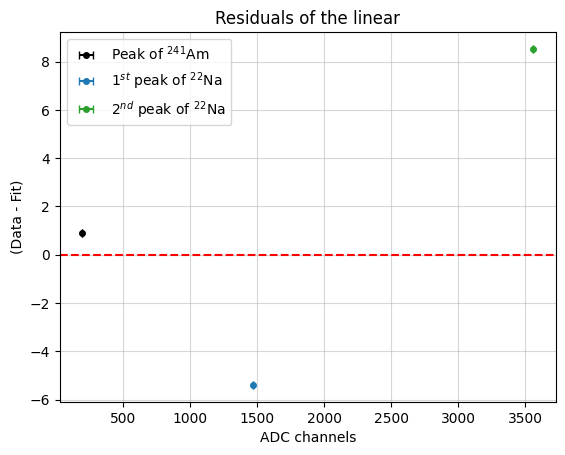

In [14]:
def linear(x, m, q):
    return m*x+q

# Primo grafico: fit di calibrazione
plt.errorbar(ADC_ch0[2], known_energies[2], xerr=sigma_ADC_ch0[2], fmt='o', color='black', label='Peak of $^{241}$Am', markersize=4, capsize=3)
plt.errorbar(ADC_ch0[0], known_energies[0], xerr=sigma_ADC_ch0[0], fmt='o', color='#1f77b4', label='$1^{st}$ peak of $^{22}$Na', markersize=4, capsize=3)
plt.errorbar(ADC_ch0[1], known_energies[1], xerr=sigma_ADC_ch0[1], fmt='o', color='#2ca02c', label='$2^{nd}$ peak of $^{22}$Na', markersize=4, capsize=3)

# Fit lineare
x_fit = np.linspace(ADC_ch0.min(), ADC_ch0.max(), 100)
plt.plot(x_fit, linear(x_fit, calibrazione_ch0[0], calibrazione_ch0[1]), color='red', label='Linear fit', lw=1)

# Dettagli del grafico
plt.xlabel('ADC channels')
plt.ylabel('Energy [KeV]')
plt.title('Energy calibration fit of NaI(Tl)')
plt.grid(alpha=0.5)
plt.legend()
plt.savefig('grafici/energy_calibration/fitNaI.pdf')
plt.show()

# Secondo grafico: residui
fit_values = linear(ADC_ch0, calibrazione_ch0[0], calibrazione_ch0[1])
residuals = known_energies - fit_values

plt.errorbar(ADC_ch0[2], residuals[2], xerr=sigma_ADC_ch0[2], fmt='o', color='black', label='Peak of $^{241}$Am', markersize=4, capsize=3)
plt.errorbar(ADC_ch0[0], residuals[0], xerr=sigma_ADC_ch0[0], fmt='o', color='#1f77b4', label='$1^{st}$ peak of $^{22}$Na', markersize=4, capsize=3)
plt.errorbar(ADC_ch0[1], residuals[1], xerr=sigma_ADC_ch0[1], fmt='o', color='#2ca02c', label='$2^{nd}$ peak of $^{22}$Na', markersize=4, capsize=3)

# Linea orizzontale per i residui
plt.axhline(0, color='red', linestyle='--', lw=1.5)

# Dettagli del grafico
plt.xlabel('ADC channels')
plt.ylabel('(Data - Fit)')
plt.title('Residuals of the linear')
plt.grid(alpha=0.5)
plt.legend()
plt.savefig('grafici/energy_calibration/residuiNaI.pdf')
plt.show()

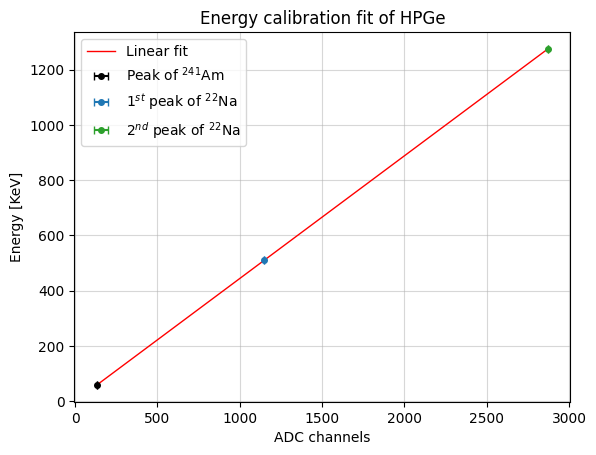

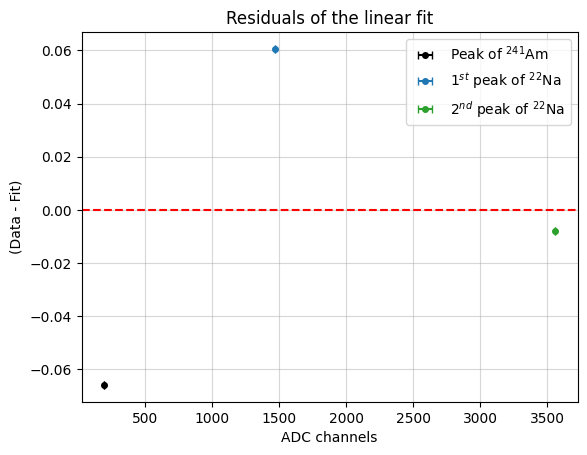

In [15]:
# Primo grafico: fit di calibrazione
plt.errorbar(ADC_ch1[2], known_energies[2], xerr=sigma_ADC_ch1[2], fmt='o', color='black', label='Peak of $^{241}$Am', markersize=4, capsize=3)
plt.errorbar(ADC_ch1[0], known_energies[0], xerr=sigma_ADC_ch1[0], fmt='o', color='#1f77b4', label='$1^{st}$ peak of $^{22}$Na', markersize=4, capsize=3)
plt.errorbar(ADC_ch1[1], known_energies[1], xerr=sigma_ADC_ch1[1], fmt='o', color='#2ca02c', label='$2^{nd}$ peak of $^{22}$Na', markersize=4, capsize=3)

# Fit lineare
x_fit = np.linspace(ADC_ch1.min(), ADC_ch1.max(), 100)
plt.plot(x_fit, linear(x_fit, calibrazione_ch1[0], calibrazione_ch1[1]), color='red', label='Linear fit', lw=1)

# Dettagli del grafico
plt.xlabel('ADC channels')
plt.ylabel('Energy [KeV]')
plt.title('Energy calibration fit of HPGe')
plt.grid(alpha=0.5)
plt.legend()
plt.savefig('grafici/energy_calibration/fitHPGe.pdf')
plt.show()

# Secondo grafico: residui
fit_values = linear(ADC_ch1, calibrazione_ch1[0], calibrazione_ch1[1])
residuals = known_energies - fit_values

plt.errorbar(ADC_ch0[2], residuals[2], xerr=sigma_ADC_ch1[2], fmt='o', color='black', label='Peak of $^{241}$Am', markersize=4, capsize=3)
plt.errorbar(ADC_ch0[0], residuals[0], xerr=sigma_ADC_ch1[0], fmt='o', color='#1f77b4', label='$1^{st}$ peak of $^{22}$Na', markersize=4, capsize=3)
plt.errorbar(ADC_ch0[1], residuals[1], xerr=sigma_ADC_ch1[1], fmt='o', color='#2ca02c', label='$2^{nd}$ peak of $^{22}$Na', markersize=4, capsize=3)

# Linea orizzontale per i residui
plt.axhline(0, color='red', linestyle='--', lw=1.5)

# Dettagli del grafico
plt.xlabel('ADC channels')
plt.ylabel('(Data - Fit)')
plt.title('Residuals of the linear fit')
plt.grid(alpha=0.5)
plt.legend()
plt.savefig('grafici/energy_calibration/residuiHPGe.pdf')
plt.show()

## EFFICIENZA HPGe

### calcolo picchi

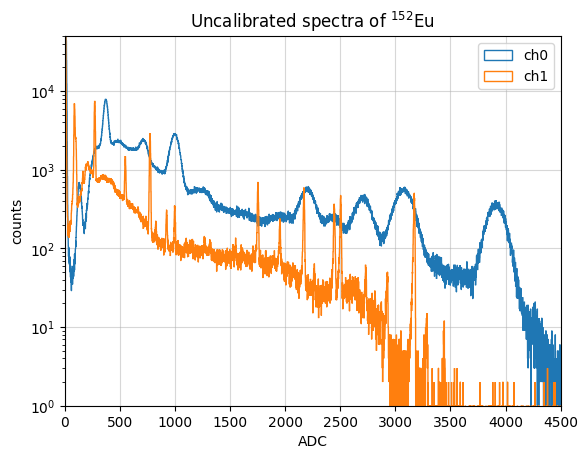

In [16]:
plt.hist(europio_ch0, bins=int(europio_ch0.max()), histtype='step', lw=1, label="ch0"), plt.hist(europio_ch1, bins=int(europio_ch1.max()), histtype='step', lw=1, label="ch1")
plt.title('Uncalibrated spectra of $^{152}$Eu')
plt.legend(loc='upper right')
plt.xlabel("ADC")
plt.ylabel("counts")
plt.xlim(0, 4500)
plt.ylim(1, 50000)
plt.yscale("log")
plt.grid(True, alpha=0.5)
plt.show()

In [17]:
europio1_calib = europio_ch1*calibrazione_ch1[0]+calibrazione_ch1[1]
fondo2_ch1_calib = fondo2_ch1*calibrazione_ch1[0]+calibrazione_ch1[1]

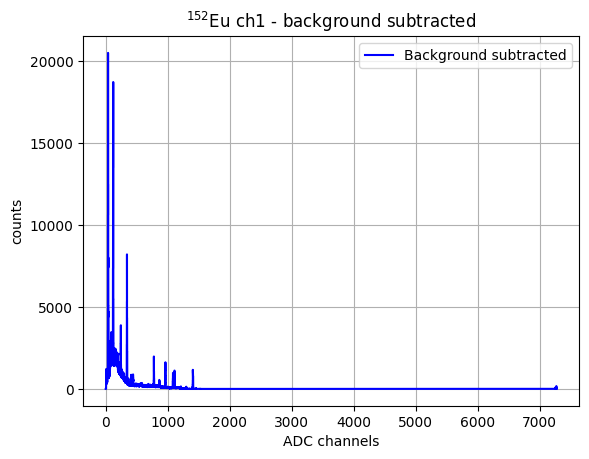

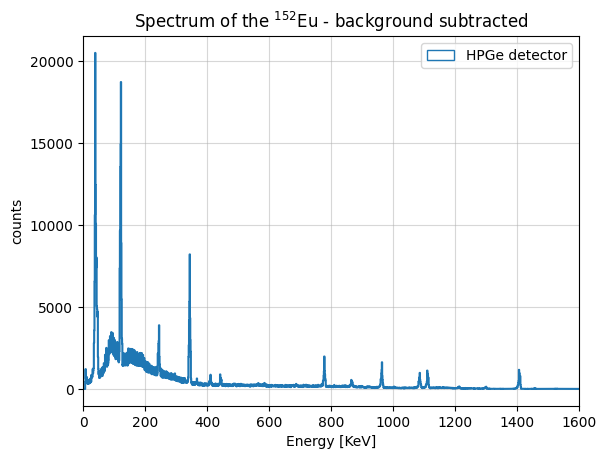

In [18]:
bin_europio_calib, hist_europio_calib = ben.background(europio1_calib, fondo2_ch1_calib, None, 'ADC channels', 'counts', '$^{152}$Eu ch1 - background subtracted')
plt.step(bin_europio_calib, hist_europio_calib)
custom_patches = [
    Patch(edgecolor='#1f77b4', facecolor='none', linewidth=1, label='HPGe detector'),
]
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.title('Spectrum of the $^{152}$Eu - background subtracted')
plt.legend(handles=custom_patches)
plt.xlim(0, 1600)
plt.grid(alpha=0.5)
plt.savefig('grafici/efficiency_calibration/Eu_backsubtracted.pdf')
plt.show()


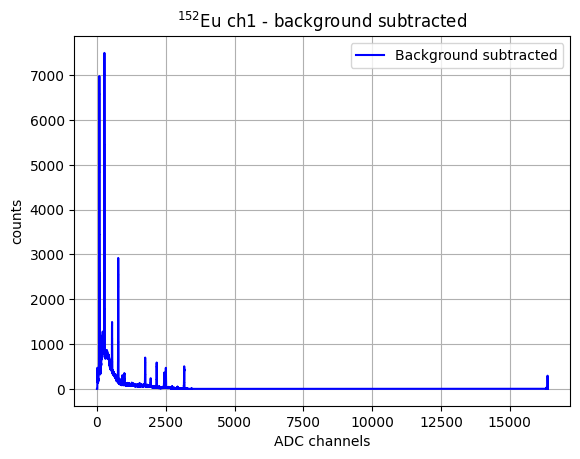

In [19]:
bin_europio_ch1_corr, hist_europio_ch1_corr = ben.background(europio_ch1, fondo2_ch1, None, 'ADC channels', 'counts', '$^{152}$Eu ch1 - background subtracted')

In [20]:
# plt.step(bin_europio_ch0_corr, hist_europio_ch0_corr, color='#1f77b4', lw=1, label='ch0'), plt.step(bin_europio_ch1_corr, hist_europio_ch1_corr, color='orange', lw=1, label='ch1')
# plt.title('Spectra of $^{152}$Eu - background subtracted')
# plt.xlabel("ADC")
# plt.ylabel("counts")
# plt.yscale('log')
# custom_patches = [
#     Patch(edgecolor='#1f77b4', facecolor='none', linewidth=1, label='ch0'),
#     Patch(edgecolor='orange', facecolor='none', linewidth=1, label='ch1'),
# ]
# plt.legend(handles=custom_patches)
# plt.xlim(0, 4500)
# plt.ylim(1, 50000)
# plt.grid(alpha=0.5)
# plt.show()

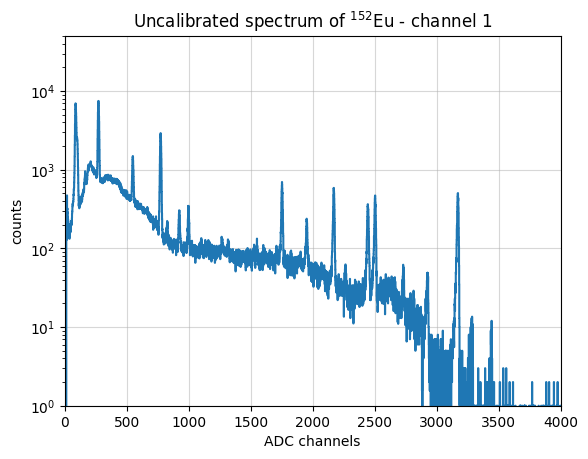

In [21]:
plt.step(bin_europio_ch1_corr, hist_europio_ch1_corr)
plt.xlim(0, 4000)
plt.ylim(1, 50000)
plt.yscale('log')
plt.grid(alpha=0.5)
plt.title('Uncalibrated spectrum of $^{152}$Eu - channel 1')
plt.xlabel('ADC channels')
plt.ylabel('counts')
# plt.axvline(2940, 0, 2000, color='red')
plt.show()

In [22]:
k=2
print(f'-----------------------------------------------')
print(f'Peak 1')
europioch1_peak1 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='1st peak of Eu', xmin=82, xmax=95, n=k)
print(f'Peak 2')
europioch1_peak2 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='2nd peak of Eu', xmin=265, xmax=280, n=k)
print(f'Peak 3')
europioch1_peak3 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='3rd peak of Eu', xmin=540, xmax=560, n=k)
print(f'Peak 4')
europioch1_peak4 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='4th peak of Eu', xmin=765, xmax=785, n=k)
print(f'Peak 5')
europioch1_peak5 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='5th peak of Eu', xmin=917, xmax=932, n=k)
print(f'Peak 6')
europioch1_peak6 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='6th peak of Eu', xmin=990, xmax=1007, n=k)
print(f'Peak 7')
europioch1_peak7 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='7th peak of Eu', xmin=1745, xmax=1765, n=k)
print(f'Peak 8')
europioch1_peak8 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='8th peak of Eu', xmin=1945, xmax=1960, n=k)
print(f'Peak 9')
europioch1_peak9 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='9th peak of Eu', xmin=2165, xmax=2180, n=k)
print(f'Peak 10')
europioch1_peak10 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='10th peak of Eu', xmin=2437, xmax=2455, n=k)
print(f'Peak 11')
europioch1_peak11 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='11th peak of Eu', xmin=2498, xmax=2520, n=k)
print(f'Peak 12')
europioch1_peak12 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='12th peak of Eu', xmin=2725, xmax=2740, n=k)
print(f'Peak 13')
europioch1_peak13 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='13th peak of Eu', xmin=2920, xmax=2935, n=k)
print(f'Peak 14')
europioch1_peak14 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='14th peak of Eu', xmin=3160, xmax=3183, n=k)

-----------------------------------------------
Peak 1
Ampiezza = 78736.14806667142 ± 1528.7843590780635
Media = 89.38656911404314 ± 0.08597366589925402
Sigma = 4.522362907206887 ± 0.11417183752350364
Chi-quadro = 101.38524620004905
Chi-quadro ridotto = 10.138524620004905
Integrale dell'istogramma nel range [80.34184329962937, 98.43129492845691] = 77852 ± 279
-----------------------------------------------
Peak 2
Ampiezza = 85073.65338061415 ± 1215.8176716056284
Media = 273.2130881783164 ± 0.06856549364035815
Sigma = 4.570491553309549 ± 0.0835870120859904
Chi-quadro = 104.02428825879782
Chi-quadro ridotto = 8.668690688233152
Integrale dell'istogramma nel range [264.0721050716973, 282.3540712849355] = 81613 ± 285
-----------------------------------------------
Peak 3
Ampiezza = 21343.160149296284 ± 432.3607363236168
Media = 550.2360269592177 ± 0.12834854242925978
Sigma = 6.007492847403818 ± 0.15534233977050915
Chi-quadro = 83.96016645026788
Chi-quadro ridotto = 4.938833320603993
Integra

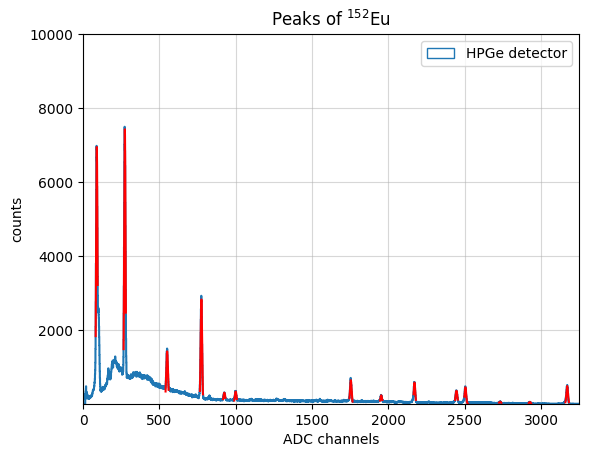

In [23]:
plot_peak1 = europioch1_peak1[5]
plot_peak2 = europioch1_peak2[5]
plot_peak3 = europioch1_peak3[5]
plot_peak4 = europioch1_peak4[5]
plot_peak5 = europioch1_peak5[5]
plot_peak6 = europioch1_peak6[5]
plot_peak7 = europioch1_peak7[5]
plot_peak8 = europioch1_peak8[5]
plot_peak9 = europioch1_peak9[5]
plot_peak10 = europioch1_peak10[5]
plot_peak11 = europioch1_peak11[5]
plot_peak12 = europioch1_peak12[5]
plot_peak13 = europioch1_peak13[5]
plot_peak14 = europioch1_peak14[5]

# plt.figure(figsize=(16*2/3, 9*2/3))  # Larghezza = 16, Altezza = 9
custom_patches = [Patch(edgecolor='#1f77b4', facecolor='none', linewidth=1, label='HPGe detector')]
plt.step(plot_peak1[0], plot_peak1[1]) #plot dei dati
plt.plot(plot_peak1[2], plot_peak1[3], color='red') #fit 1 picco
plt.plot(plot_peak2[2], plot_peak2[3], color='red') #fit 2 picco
plt.plot(plot_peak3[2], plot_peak3[3], color='red') #fit 3 picco
plt.plot(plot_peak4[2], plot_peak4[3], color='red') #fit 4 picco
plt.plot(plot_peak5[2], plot_peak5[3], color='red') #fit 5 picco
plt.plot(plot_peak6[2], plot_peak6[3], color='red') #fit 6 picco
plt.plot(plot_peak7[2], plot_peak7[3], color='red') #fit 7 picco
plt.plot(plot_peak8[2], plot_peak8[3], color='red') #fit 8 picco
plt.plot(plot_peak9[2], plot_peak9[3], color='red') #fit 9 picco
plt.plot(plot_peak10[2], plot_peak10[3], color='red') #fit 10 picco
plt.plot(plot_peak11[2], plot_peak11[3], color='red') #fit 11 picco
plt.plot(plot_peak12[2], plot_peak12[3], color='red') #fit 12 picco
plt.plot(plot_peak13[2], plot_peak13[3], color='red') #fit 13 picco
plt.plot(plot_peak14[2], plot_peak14[3], color='red') #fit 14 picco
plt.xlim(0, 3250)
# plt.xlim(2600, 2800)
plt.ylim(1, 1e+4)
plt.grid(alpha=0.5)
# plt.yscale('log')
plt.title('Peaks of $^{152}$Eu')
plt.xlabel('ADC channels')
plt.ylabel('counts')
plt.legend(handles=custom_patches)
plt.show()

### efficienze calcoli

In [24]:
'''a partire dall'attività del 1/12/1990 (395 kBq) e da quella di settembre 2022 (74.7 kBq) calcoliamo l'attività odierna: '''
a1 = 395 #attività iniziale
a2 = 74.7 #attività a settembre 2022
delta = 11597*24*60*60 #delta di tempo 1990-2022
cost = -np.log(a2/a1)/(delta) #costante di decadimento
deltaf = 811*24*60*60 #tempo tra 1/9/2022 e 20/11/2024
afEU = a2*np.exp(-cost*deltaf)*1000 #attività al 10/11/2024
print(f'costante di decadimento \u03BB: {cost}\nattività al 20/11/2024: {afEU}')

'''l'angolo solido è dato da: sin^2(arctan(r/d)/2)
dove r è il raggio del detector e d è la distanza della sorgente dal detector'''
r = 1.95 #cm
r_err = 0.05/np.sqrt(24)
d = 20
d_err = 0.05/np.sqrt(24) #cm
alfa = (np.sin(np.arctan(r/d)/2))**2
alfa_err= (np.sin(np.arctan(r/d))/(d**2+r**2))*np.sqrt(r**2*d_err**2+d**2*r_err**2)
print('--------------------------------------------------------')
print(f'angolo solido è \u03B1 = {alfa}')

costante di decadimento λ: 1.6621133586215925e-09
attività al 20/11/2024: 66487.57873363837
--------------------------------------------------------
angolo solido è α = 0.002359751474426659


In [25]:
'''qua mettiamo l'integral dei picchi e le ripesttive abundances'''
picchi = [europioch1_peak1, europioch1_peak2, europioch1_peak3, europioch1_peak4, europioch1_peak5, europioch1_peak6, europioch1_peak7, 
                   europioch1_peak8, europioch1_peak9, europioch1_peak10, europioch1_peak11, europioch1_peak12, europioch1_peak13, europioch1_peak14]

photons = []
photons_err = []
energies = []
energies_err = []

for i, elemento in enumerate(picchi):
    if i > 0:
        photons.append(elemento[6])
        photons_err.append(elemento[7])
        energies.append(elemento[0][1]*calibrazione_ch1[0]+calibrazione_ch1[1])
        energies_err.append((elemento[0][1]**2)*(calibrazione_ch1[2]**2)+(elemento[1][1]**2)*(calibrazione_ch1[0]**2)+calibrazione_ch1[1]**2)

photons = np.array(photons)
photons_err = np.array(photons_err)
energies = np.array(energies)
energies_err = np.array(energies_err)

for i in range(len(energies)):
    print(f'picco {i} = {energies[i]} keV')

abundances = np.array([0.2841, 0.0755, 0.2659, 0.02238, 0.028, 0.1297, 0.04243, 0.145, 0.1013, 0.1341, 0.01416, 0.01633, 0.2085])
abundances_err = np.array([0.0013, 0.0004, 0.0012, 0.0001, 0.0002, 0.0006, 0.00023, 0.0006, 0.0006, 0.0006, 0.00009, 0.00009, 0.0008])

t = 1195.729 #tempo di acquisizione

afEU = 7.47E+04

effs = photons/(afEU*t*abundances*alfa)
effs_err = 1/(afEU*t)*np.sqrt((photons_err/(alfa*abundances))**2+(photons*abundances_err/(alfa*abundances**2))**2+(photons*alfa_err/(alfa**2*abundances)))

rel = np.array([141.0, 36.6, 127.2, 10.71, 15.00, 62.6, 20.54, 70.4, 48.7, 65.0, 6.67, 7.76, 100])
rel_err = np.array([4.0, 1.1, 1.3, 0.11, 0.15, 0.6, 0.21, 0.7, 0.5, 0.7, 0.07, 0.08, 1.0])
eff_rel = photons*rel[12]/(photons[12]*rel)
# eff_rel_err = np.sqrt((rel[12]*photons_err/(photons[12]*rel))**2+(photons*rel_err[12]/(photons[12]*rel))**2+(photons*rel[12]*photons_err[12]/(rel*photons[12]**2))**2+(photons*rel[12]*rel_err[12]/(rel**2+photons[12]))**2)
eff_rel_err = np.array([0.3164258264, 0.3345322128, 0.08344660616, 0.1766194099, 0.1272506365, 0.2395137904, 0.06868437518, 0.03638600575, 0.0406973523, 0.03353639526, 0.08675728808, 0.05999092899, 0.022975141])


picco 0 = 121.73573972281969 keV
picco 1 = 244.68889395272222 keV
picco 2 = 344.2979287391655 keV
picco 3 = 411.05076731219634 keV
picco 4 = 443.98192568899435 keV
picco 5 = 778.86745471796 keV
picco 6 = 867.2205390550682 keV
picco 7 = 964.0932607678609 keV
picco 8 = 1086.1533897572829 keV
picco 9 = 1112.0890217290032 keV
picco 10 = 1213.1173000109025 keV
picco 11 = 1299.5213513263413 keV
picco 12 = 1408.128478113193 keV


### relative eff

Risultati del fit:
A = 13.976719645218752 ± 10.017744814512392
tau = -716.7044163542818 ± 1118.3206519401847
f = -1.7956331265323293 ± 11.717996381914729

Chi quadri:
1.3916003981973186
19.08669483868691
1027.0650928754267
53.02918676536929
9.689433730934068
10.99616934802582
16.41547190906102
39.27015534999002
116.31648060317737
57.51234089839817
297.73291824344153
234.71334262203078
1324.5908587913102


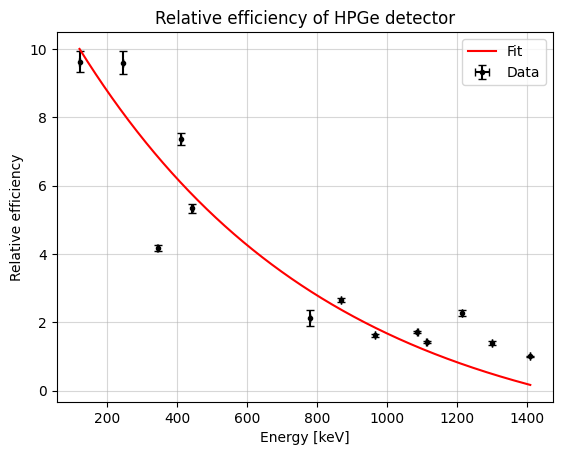

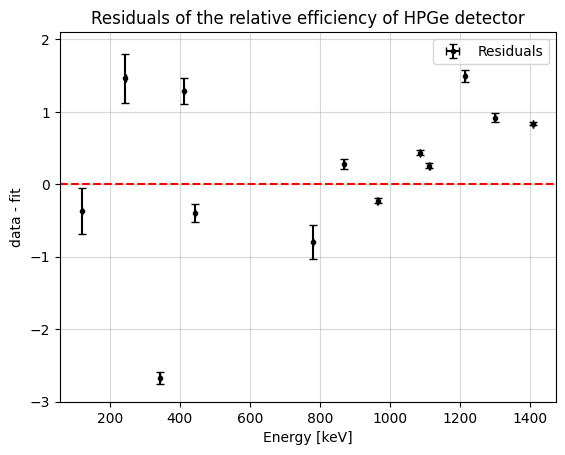

In [26]:
# Definizione della funzione esponenziale
def exp(x, A, tau, f):
    return A * np.exp(x / tau) + f

# Calcolo della varianza totale, considerando incertezze su x e y
def total_variance(x, x_err, y_err, A, tau, f):
    y_model = exp(x, A, tau, f)
    dy_dx = (A / tau) * np.exp(x / tau)  # Derivata di exp rispetto a x
    return y_err**2 + (dy_dx * x_err)**2

# Funzione di fit con curve_fit
def fit_with_x_errors(x, y, x_err, y_err, initial_guess):
    def wrapped_func(x, A, tau, f):
        return exp(x, A, tau, f)
    
    # Stima iniziale dei pesi
    weights = 1 / np.sqrt(total_variance(x, x_err, y_err, *initial_guess))
    
    # Fit con curve_fit
    params, covariance = curve_fit(wrapped_func, x, y, sigma=weights, p0=initial_guess, absolute_sigma=True)
    return params, covariance

# Parametri iniziali
initial_guess = [1909.4, -1/0.002, 1]
# Eseguiamo il fit
params, covariance = fit_with_x_errors(energies, eff_rel, energies_err, eff_rel_err, initial_guess)
Arel, taurel, frel = params
Arel_err, taurel_err, frel_err = np.sqrt(np.diag(covariance))
# Stampa dei risultati
print("Risultati del fit:")
print(f"A = {Arel} ± {Arel_err}")
print(f"tau = {taurel} ± {taurel_err}")
print(f"f = {frel} ± {frel_err}")
#chi2
def chi2(x, A, tau, f, y, sy):
    expected = exp(x, A, tau, f)
    chi2 = ((y-expected)/sy)**2
    return chi2
chi2_eff = chi2(energies, params[0], params[1], params[2], eff_rel, eff_rel_err)
print('\nChi quadri:')
for i in range(len(chi2_eff)):
    print(f'{chi2_eff[i]}')

x_fit = np.linspace(energies.min(), energies.max(), 1000)
plt.errorbar(energies, eff_rel, xerr=energies_err, yerr=eff_rel_err, fmt='o', color='black', label='Data', capsize=3, markersize=3)
plt.plot(x_fit, exp(x_fit, Arel, taurel, frel), lw=1.5, color='red', label='Fit')
plt.xlabel("Energy [keV]")
plt.ylabel("Relative efficiency")
plt.title("Relative efficiency of HPGe detector")
plt.legend()
plt.grid(alpha=0.5)
plt.savefig('grafici/efficiency_calibration/hpge_eff_relativa.pdf')
plt.show()

plt.errorbar(energies, eff_rel-exp(energies, Arel, taurel, frel), xerr=energies_err, yerr=eff_rel_err, fmt='o', label='Residuals', capsize=3, markersize=3, color='black')
plt.axhline(0, lw=1.5, color='red', linestyle='--', )
plt.xlabel("Energy [keV]")
plt.ylabel("data - fit")
plt.title("Residuals of the relative efficiency of HPGe detector")
plt.legend()
plt.grid(alpha=0.5)
plt.ylim(-3, 2.1)
plt.savefig('grafici/efficiency_calibration/hpge_rel_eff_residui.pdf')
plt.show()

Risultati del fit:
A = 13.976719645218752 ± 10.017744814512392
tau = -716.7044163542818 ± 1118.3206519401847
f = -1.7956331265323293 ± 11.717996381914729

Chi quadri:
1.3916003981973186
19.08669483868691
53.02918676536929
9.689433730934068
10.99616934802582
16.41547190906102
39.27015534999002
116.31648060317737
57.51234089839817
297.73291824344153
234.71334262203078
1324.5908587913102


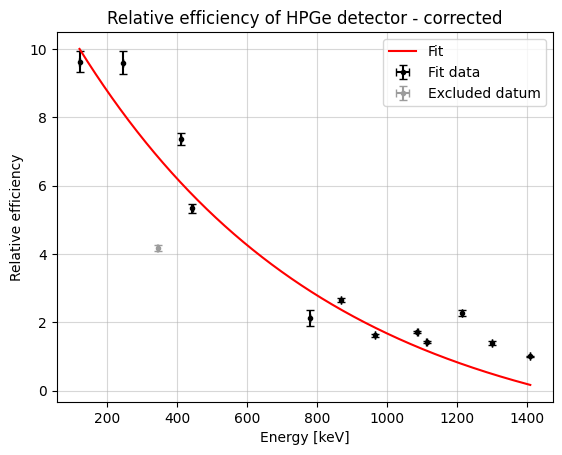

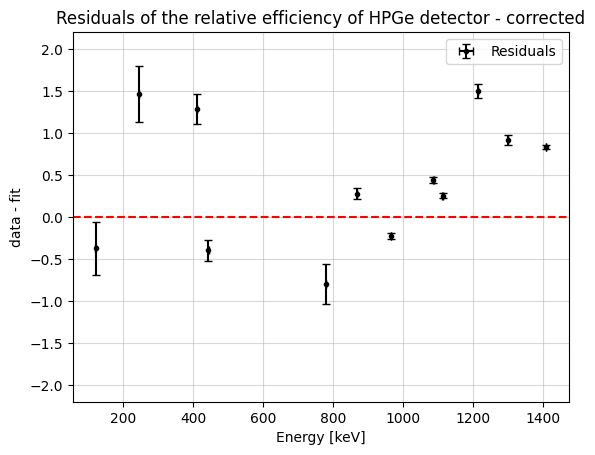

In [27]:
energies_ok = []
energies_ok_err = []
eff_rel_ok = []
eff_rel_ok_err =[]

for i in range(len(energies)):
    if i !=2:
        energies_ok.append(energies[i])
        energies_ok_err.append(energies_err[i])
        eff_rel_ok.append(eff_rel[i])
        eff_rel_ok_err.append(eff_rel_err[i])

energies_ok = np.array(energies_ok)
energies_ok_err = np.array(energies_ok_err)
eff_rel_ok = np.array(eff_rel_ok)
eff_rel_ok_err = np.array(eff_rel_ok_err)

# Parametri iniziali
initial_guess = [1909.4, -1/0.002, 1]
# Eseguiamo il fit
params, covariance = fit_with_x_errors(energies, eff_rel, energies_err, eff_rel_err, initial_guess)
Arelok, taurelok, frelok = params
Arelok_err, taurelok_err, frelok_err = np.sqrt(np.diag(covariance))
# Stampa dei risultati
print("Risultati del fit:")
print(f"A = {Arelok} ± {Arelok_err}")
print(f"tau = {taurelok} ± {taurelok_err}")
print(f"f = {frelok} ± {frelok_err}")
#chi2
def chi2(x, A, tau, f, y, sy):
    expected = exp(x, A, tau, f)
    chi2 = ((y-expected)/sy)**2
    return chi2
chi2_eff = chi2(energies_ok, params[0], params[1], params[2], eff_rel_ok, eff_rel_ok_err)
print('\nChi quadri:')
for i in range(len(chi2_eff)):
    print(f'{chi2_eff[i]}')

x_fit = np.linspace(energies_ok.min(), energies_ok.max(), 1000)
plt.errorbar(energies_ok, eff_rel_ok, xerr=energies_ok_err, yerr=eff_rel_ok_err, fmt='o', color='black', label='Fit data', capsize=3, markersize=3)
plt.errorbar(energies[2], eff_rel[2], xerr=energies_err[2], yerr=eff_rel_err[2], fmt='o', label='Excluded datum', capsize=3, markersize=3, color='#9c9c9c')
plt.plot(x_fit, exp(x_fit, Arelok, taurelok, frelok), lw=1.5, color='red', label='Fit')
plt.xlabel("Energy [keV]")
plt.ylabel("Relative efficiency")
plt.title("Relative efficiency of HPGe detector - corrected")
plt.legend()
plt.grid(alpha=0.5)
plt.savefig('grafici/efficiency_calibration/hpge_eff_relativa_corr.pdf')
plt.show()

plt.errorbar(energies_ok, eff_rel_ok-exp(energies_ok, Arelok, taurelok, frelok), xerr=energies_ok_err, yerr=eff_rel_ok_err, fmt='o', label='Residuals', capsize=3, markersize=3, color='black')
plt.axhline(0, lw=1.5, color='red', linestyle='--', )
plt.xlabel("Energy [keV]")
plt.ylabel("data - fit")
plt.title("Residuals of the relative efficiency of HPGe detector - corrected")
plt.legend()
plt.grid(alpha=0.5)
plt.ylim(-2.2, 2.2)
plt.savefig('grafici/efficiency_calibration/hpge_rel_eff_residui_corr.pdf')
plt.show()

### intrinsic eff

Risultati del fit:
A = 1.8510108822738616 ± 9.308609257120832
tau = -623.6993684237776 ± 7164.395972883949
f = -0.12419061352929232 ± 11.02949445523409

Chi quadri:
20.698513682528624
307.05563176663907
8271.708824029787
130.4905994231242
5.520200335337092
1048.6581450295857
19.455204745720657
266.2159158169033
95.94214348645127
11.629974439324538
260.07468040277433
131.22324941251964
1359.4315177806222


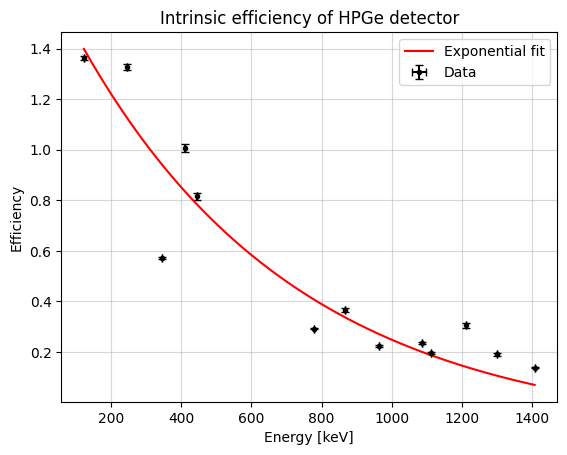

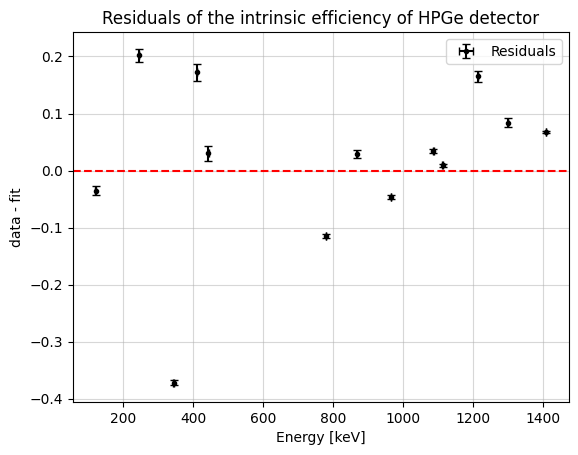

In [28]:
# Definizione della funzione esponenziale
def exp(x, A, tau, f):
    return A * np.exp(x / tau) + f

# Calcolo della varianza totale, considerando incertezze su x e y
def total_variance(x, x_err, y_err, A, tau, f):
    y_model = exp(x, A, tau, f)
    dy_dx = (A / tau) * np.exp(x / tau)  # Derivata di exp rispetto a x
    return y_err**2 + (dy_dx * x_err)**2

# Funzione di fit con curve_fit
def fit_with_x_errors(x, y, x_err, y_err, initial_guess):
    def wrapped_func(x, A, tau, f):
        return exp(x, A, tau, f)
    
    # Stima iniziale dei pesi
    weights = 1 / np.sqrt(total_variance(x, x_err, y_err, *initial_guess))
    
    # Fit con curve_fit
    params, covariance = curve_fit(wrapped_func, x, y, sigma=weights, p0=initial_guess, absolute_sigma=True)
    return params, covariance

# Parametri iniziali
initial_guess = [1909.4, -1/0.002, 1]
# Eseguiamo il fit
params, covariance = fit_with_x_errors(energies, effs, energies_err, effs_err, initial_guess)
A, tau, f = params
A_err, tau_err, f_err = np.sqrt(np.diag(covariance))
# Stampa dei risultati
print("Risultati del fit:")
print(f"A = {A} ± {A_err}")
print(f"tau = {tau} ± {tau_err}")
print(f"f = {f} ± {f_err}")
#chi2
def chi2(x, A, tau, f, y, sy):
    expected = exp(x, A, tau, f)
    chi2 = ((y-expected)/sy)**2
    return chi2
chi2_eff = chi2(energies, params[0], params[1], params[2], effs, effs_err)
print('\nChi quadri:')
for i in range(len(chi2_eff)):
    print(f'{chi2_eff[i]}')

# Creazione dei dati per il grafico del fit
x_fit = np.linspace(min(energies), max(energies), 1000)
y_fit = exp(x_fit, A, tau, f)
effs_fit = exp(energies, A, tau, f)
# Plot dei dati e del fit
plt.errorbar(energies, effs, xerr=energies_err, yerr=effs_err, fmt='o', label='Data', capsize=3, markersize=3, color='black')
plt.plot(x_fit, y_fit, color='red', label='Exponential fit')
plt.xlabel("Energy [keV]")
plt.ylabel("Efficiency")
plt.title("Intrinsic efficiency of HPGe detector")
plt.legend()
plt.grid(alpha=0.5)
plt.savefig('grafici/efficiency_calibration/hpge_eff_primofit.pdf')
plt.show()

plt.errorbar(energies, effs-effs_fit, xerr=energies_err, yerr=effs_err, fmt='o', label='Residuals', capsize=3, markersize=3, color='black')
plt.axhline(0, lw=1.5, color='red', linestyle='--', )
plt.xlabel("Energy [keV]")
plt.ylabel("data - fit")
plt.title("Residuals of the intrinsic efficiency of HPGe detector")
plt.legend()
plt.grid(alpha=0.5)
plt.savefig('grafici/efficiency_calibration/hpge_primofit_residui.pdf')
plt.show()


Risultati del fit:
A = 2.885232441714704 ± 67.58567151347835
tau = -1718.5942270052517 ± 55334.04667472615
f = -1.2860681343110327 ± 69.58027028523621

Ci quadri
24.645619998523657
93.96379846558912
1.843595542680007
95.21892311567727
180.87110772739305
12.11743806305783
103.63710509668641
266.96156428413315
275.64607509476684
6845.850038245613


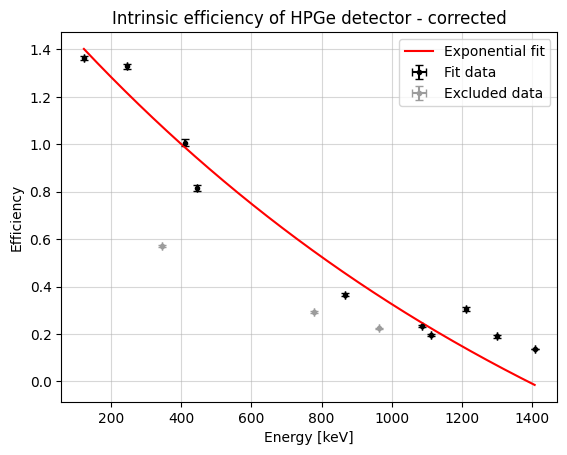

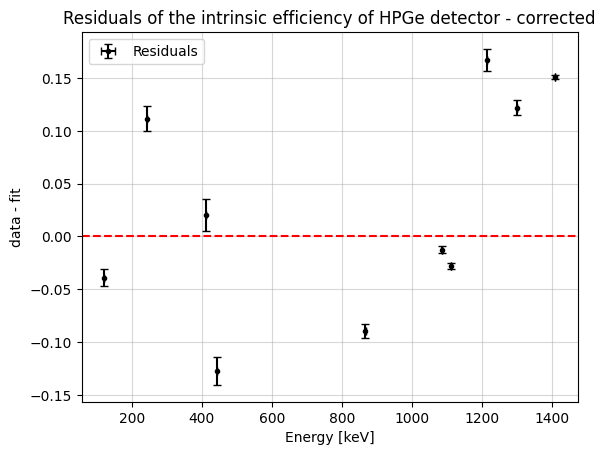

In [29]:
energies_final = []
effs_final = []
energies_err_final = []
effs_err_final = []

energies_no = []
energies_err_no = []
effs_no = []
effs_err_no = []

for i in range(len(energies)):
    if i!=2 and i!=5 and i!=7:
        energies_final.append(energies[i])
        effs_final.append(effs[i])
        energies_err_final.append(energies_err[i])
        effs_err_final.append(effs_err[i])
    else: 
        energies_no.append(energies[i])
        effs_no.append(effs[i])
        energies_err_no.append(energies_err[i])
        effs_err_no.append(effs_err[i])

energies_final = np.array(energies_final)
energies_err_final = np.array(energies_err_final)
effs_final = np.array(effs_final)
effs_err_final = np.array(effs_err_final)

energies_no = np.array(energies_no)
energies_err_no = np.array(energies_err_no)
effs_no = np.array(effs_no)
effs_err_no = np.array(effs_err_no)


# Parametri iniziali
initial_guess = [1909.4, -1/0.002, 1]
# Eseguiamo il fit
params, covariance = fit_with_x_errors(energies_final, effs_final, energies_err_final, effs_err_final, initial_guess)
A, tau, f = params
A_err, tau_err, f_err = np.sqrt(np.diag(covariance))
# Stampa dei risultati
print("Risultati del fit:")
print(f"A = {A} ± {A_err}")
print(f"tau = {tau} ± {tau_err}")
print(f"f = {f} ± {f_err}")
#chi2
def chi2(x, A, tau, f, y, sy):
    expected = exp(x, A, tau, f)
    chi2 = ((y-expected)/sy)**2
    return chi2
chi2_eff = chi2(energies_final, params[0], params[1], params[2], effs_final, effs_err_final)
print('\nCi quadri')
for i in range(len(chi2_eff)):
    print(f'{chi2_eff[i]}')


# Creazione dei dati per il grafico del fit
x_fit = np.linspace(min(energies_final), max(energies_final), 1000)
y_fit = exp(x_fit, A, tau, f)
effs_fit = exp(energies_final, A, tau, f)
# Plot dei dati e del fit
plt.errorbar(energies_final, effs_final, xerr=energies_err_final, yerr=effs_err_final, fmt='o', label='Fit data', capsize=3, markersize=3, color='black')
plt.errorbar(energies_no, effs_no, xerr=energies_err_no, yerr=effs_err_no, fmt='o', label='Excluded data', capsize=3, markersize=3, color='#9c9c9c')
plt.plot(x_fit, y_fit, color='red', label='Exponential fit')
plt.xlabel("Energy [keV]")
plt.ylabel("Efficiency")
plt.title("Intrinsic efficiency of HPGe detector - corrected")
plt.legend()
plt.grid(alpha=0.5)
plt.savefig('grafici/efficiency_calibration/hpge_eff_final.pdf')
plt.show()

plt.errorbar(energies_final, effs_final-effs_fit, xerr=energies_err_final, yerr=effs_err_final, fmt='o', label='Residuals', capsize=3, markersize=3, color='black')
plt.axhline(0, lw=1.5, color='red', linestyle='--', )
plt.xlabel("Energy [keV]")
plt.ylabel("data - fit")
plt.title("Residuals of the intrinsic efficiency of HPGe detector - corrected")
plt.legend()
plt.grid(alpha=0.5)
plt.savefig('grafici/efficiency_calibration/hpge_final_residui.pdf')
plt.show()

## NaI(Tl) EFFICIENCY CALIBRATION

### picchi

In [30]:
print(f'Peak 1 Na')
sodio_peak1 = ben.normal_PLOT(bin_centers=bin_sodio_ch0_corr, counts=hist_sodio_ch0_corr, xlabel='ADC channels', ylabel='counts', titolo='First peak of $^{22}$Na', xmin=1350, xmax=1600, n=2)
print(f'Peak 2 Na')
sodio_peak2 = ben.normal_PLOT(bin_centers=bin_sodio_ch0_corr, counts=hist_sodio_ch0_corr, xlabel='ADC channels', ylabel='counts', titolo='Second peak of $^{22}$Na', xmin=3300, xmax=3800, n=2)
print(f'Peak 1 Am')
americio_peak = ben.normal_PLOT(bin_centers=bin_americio_ch0_corr, counts=hist_americio_ch0_corr, xlabel='ADC channels', ylabel='counts', titolo='Peak of $^{241}$Am', xmin=180, xmax=210, n=2)

Peak 1 Na
Ampiezza = 3697540.54636566 ± 4780.387316848829
Media = 1469.7140240992871 ± 0.0753701305588071
Sigma = 50.82980298739661 ± 0.07687536497353165
Chi-quadro = 3895.450989216009
Chi-quadro ridotto = 15.771056636502061
Integrale dell'istogramma nel range [1368.0544181244938, 1571.3736300740804] = 3523750 ± 1877
-----------------------------------------------
Peak 2 Na
Ampiezza = 1070699.0896962592 ± 1446.932123584376
Media = 3559.824076266031 ± 0.1265596219708771
Sigma = 81.14238443964994 ± 0.12673611221669107
Chi-quadro = 4451.403844810062
Chi-quadro ridotto = 8.956546971448816
Integrale dell'istogramma nel range [3397.5393073867313, 3722.108845145331] = 1019322 ± 1009
-----------------------------------------------
Peak 1 Am
Ampiezza = 616134.1133117713 ± 2615.7919444924883
Media = 193.60289245688517 ± 0.04385307087478374
Sigma = 13.76678352282919 ± 0.07478701007732134
Chi-quadro = 33.86041620947423
Chi-quadro ridotto = 1.2540894892397862
Integrale dell'istogramma nel range [16

In [31]:
'''calcolo degli angoli solidi'''
r_tutti = 3.75 #cm
r_tutti_err = 0.05/np.sqrt(24)
dNa = 8.15
dNa_err = 0.05/np.sqrt(24) #cm
alfaNa = (r_tutti**2)/(4*dNa**2) #(np.sin(np.arctan(r/d)/2))**2
alfaNa_err = (1/4)*np.sqrt((2*r/d**2)**2*r_err**2 + (2*r**2/d**3)**2*d_err**2) #(np.sin(np.arctan(r/d))/(d**2+r**2))*np.sqrt(r**2*d_err**2+d**2*r_err**2)

dAm = 7.2
dAm_err = 0.05/np.sqrt(24) #cm
alfaAm = (r_tutti**2)/(4*dAm**2) #(np.sin(np.arctan(r/d)/2))**2
alfaAm_err = (1/4)*np.sqrt((2*r_tutti/dAm**2)**2*r_tutti_err**2 + (2*r**2/dAm**3)**2*dAm_err**2) #(np.sin(np.arctan(r/d))/(d**2+r**2))*np.sqrt(r**2*d_err**2+d**2*r_err**2)

dCo = 7.3
dCo_err = 0.05/np.sqrt(24)
alfaCo =  (r_tutti**2)/(4*dCo**2)
alfaCo_err = (1/4)*np.sqrt((2*r_tutti/dCo**2)**2*r_tutti_err**2 + (2*r_tutti**2/dCo**3)**2*dCo_err**2)

alfas = np.array([alfaAm, alfaNa, alfaCo, alfaNa, alfaCo])
alfas_err = np.array([alfaAm_err, alfaNa_err, alfaCo_err, alfaNa_err, alfaCo_err])

### plot efficienza

In [32]:
#energie picchi
energia_am = americio_peak[0][1]*calibrazione_ch0[0]+calibrazione_ch0[1]
energia_na1 = sodio_peak1[0][1]*calibrazione_ch0[0]+calibrazione_ch0[1]
energia_co1 = 1174.77
energia_na2 = sodio_peak2[0][1]*calibrazione_ch0[0]+calibrazione_ch0[1]
energia_co2 = 1331.19
#errori_energia
energia_am_err = 0.22
energia_na1_err = 0.22
energia_co1_err = 0.22
energia_na2_err = 0.22
energia_co2_err = 0.22
# #gamma picchi
cobalto_gamma1 = 47897*15
cobalto_gamma2 = 40407*15
cobalto_gamma1_err = 200
cobalto_gamma2_err = 200
# #array tot dei fotoni
photons = np.array([americio_peak[6], sodio_peak1[6], cobalto_gamma1, sodio_peak2[6], cobalto_gamma2])
photons_err = np.array([americio_peak[7], sodio_peak1[7], cobalto_gamma1_err, sodio_peak2[7], cobalto_gamma2_err])
energies = np.array([energia_am, energia_na1, energia_co1, energia_na2, energia_co2])
energies_err = np.array([energia_am_err, energia_na1_err, energia_co1_err, energia_na2_err, energia_co2_err])
# #tempo acquisizione
t = 600

abundances = np.array([0.3592, 0.904, 0.9973018, 0.904, 0.9983280607])
abundances_err = np.array([0.0017, 0.002, 0.0003, 0.0013, 0.000006])

attivita = np.array([4.18E+05, 3.57E+05, 235186.7322, 3.57E+05, 235186.7322])

effsNAI = photons/(attivita*t*abundances*alfas)
effsNAI_err = 1/(attivita*t)*np.sqrt((photons_err/(alfas*abundances))**2+(photons*abundances_err/(alfas*abundances**2))**2+(photons*alfas_err/(alfa**2*abundances)))

effsNAI

array([0.09831965, 0.34381899, 0.07738416, 0.09945719, 0.06521593])

In [33]:
energies_NA = np.array([energia_na1, energia_co1, energia_na2, energia_co2])
energies_err_NA = np.array([energia_na1_err, energia_co1_err, energia_na2_err, energia_co2_err])
effsNA_ok = effsNAI[1:]  # Prende tutti i valori dall'indice 1 in poi
effsNA_err_ok = effsNAI_err[1:]

energies_NA, effsNA_ok

(array([ 516.35011306, 1174.77      , 1266.01538145, 1331.19      ]),
 array([0.34381899, 0.07738416, 0.09945719, 0.06521593]))

Risultati del fit:
A = 2.8702348231334676 ± 12.867663268972848
tau = -219.4181492656148 ± 440.5876182585181
f = 0.07096367392578914 ± 0.06805946292227506

Chi quadri:
0.0004733379520229116
14100.008464410437
12615.568457579358
57525.04162411623


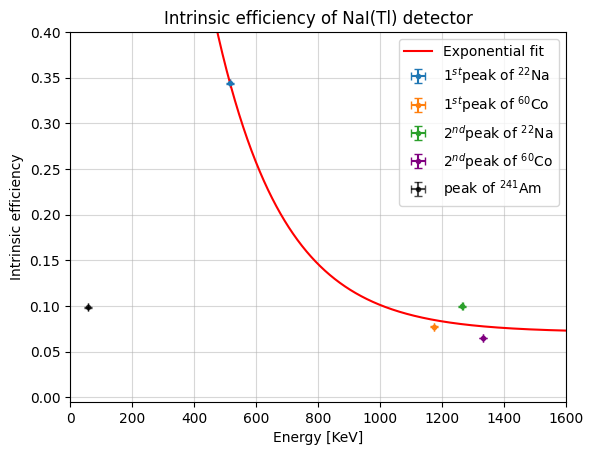

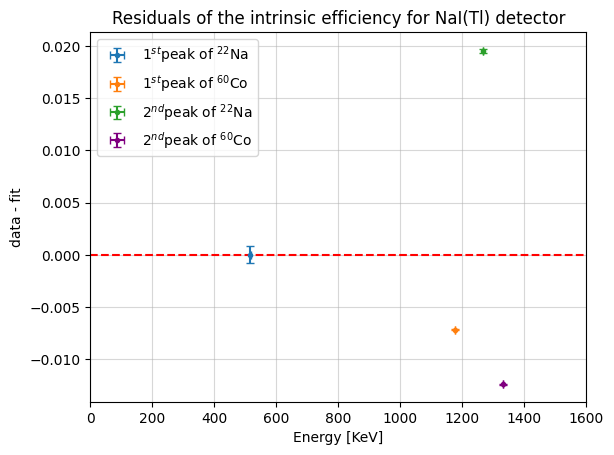

In [34]:
photonsNA = np.array([sodio_peak1[6], cobalto_gamma1, sodio_peak2[6], cobalto_gamma2])
photons_errNA = np.array([sodio_peak1[7], cobalto_gamma1_err, sodio_peak2[7], cobalto_gamma2_err])
energies_NA = np.array([energia_na1, energia_co1, energia_na2, energia_co2])
energies_err_NA = np.array([energia_na1_err, energia_co1_err, energia_na2_err, energia_co2_err])
effsNA_ok = effsNAI[1:]  # Prende tutti i valori dall'indice 1 in poi
effsNA_err_ok = effsNAI_err[1:]



# Definizione della funzione esponenziale
def exp(x, A, tau, f):
    return A * np.exp(x / tau) + f

def efficienza(x, a1, a2, a3, a4):
    eff = (a1*x**a2)/(1000*a3+x**a4)
    return eff

# # Calcolo della varianza totale, considerando incertezze su x e y
# def total_variance(x, x_err, y_err, A, tau, f):
#     y_model = exp(x, A, tau, f)
#     dy_dx = (A / tau) * np.exp(x / tau)  # Derivata di exp rispetto a x
#     return y_err**2 + (dy_dx * x_err)**2

# # Funzione di fit con curve_fit
# def fit_with_x_errors(x, y, x_err, y_err, initial_guess):
#     def wrapped_func(x, A, tau, f):
#         return exp(x, A, tau, f)
    
#     # Stima iniziale dei pesi
#     weights = 1 / np.sqrt(total_variance(x, x_err, y_err, *initial_guess))
    
    # Fit con curve_fit
    # params, covariance = curve_fit(wrapped_func, x, y, sigma=weights, p0=initial_guess, maxfev=15000)
    # return params, covariance

# Parametri iniziali
initial_guess = [2.8302, -1/0.004, 0]
# Eseguiamo il fit exponenziale
params, covariance = curve_fit(exp, energies_NA, effsNA_ok, p0=initial_guess, maxfev=15000)
A_na, tau_na, f_na = params
A_err_na, tau_err_na, f_err_na = np.sqrt(np.diag(covariance))
# Stampa dei risultati
print("Risultati del fit:")
print(f"A = {A_na} ± {A_err_na}")
print(f"tau = {tau_na} ± {tau_err_na}")
print(f"f = {f_na} ± {f_err_na}")
#chi2
def chi2(x, A, tau, f, y, sy):
    expected = exp(x, A, tau, f)
    chi2 = ((y-expected)/sy)**2
    return chi2
chi2_eff = chi2(energies_NA, params[0], params[1], params[2], effsNA_ok, effsNA_err_ok)
print('\nChi quadri:')
for i in range(len(chi2_eff)):
    print(f'{chi2_eff[i]}')


# parametri, covarianza = curve_fit(efficienza, energies_NA, effsNA_ok, maxfev=15000)
# a1, a2, a3, a4 = parametri
# a1_err, a2_err, a3_err, a4_err = np.sqrt(np.diag(covarianza))

labels = ['1$^{st}$peak of $^{22}$Na', '1$^{st}$peak of $^{60}$Co', '2$^{nd}$peak of $^{22}$Na', '2$^{nd}$peak of $^{60}$Co']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', 'purple']

x_fit = np.linspace(energies_NA.min()-100, energies_NA.max()+300, 1000)
for i in range(len(energies_NA)):
    plt.errorbar(energies_NA[i], effsNA_ok[i], xerr=energies_err_NA[i], yerr=effsNA_err_ok[i], fmt='o', markersize=3, capsize=3, color=colors[i], label=labels[i])#, xerr=energiesNA_err, yerr=effsNAI_err)
plt.errorbar(energies[0], effsNAI[0], xerr=energies_err[0], yerr=effsNAI_err[0], fmt='o', label='peak of $^{241}$Am', capsize=3, markersize=3, color='black', alpha=0.7)#'#9c9c9c')
plt.plot(x_fit, exp(x_fit, A_na, tau_na, f_na), color='red', label='Exponential fit')
# plt.plot(x_fit, efficienza(x_fit, a1, a2, a3, a4))
plt.grid(alpha=0.5)
plt.ylabel('Intrinsic efficiency')
plt.xlabel('Energy [KeV]')
plt.title('Intrinsic efficiency of NaI(Tl) detector')
plt.legend()
plt.xlim(0, 1600)
plt.ylim(-0.005, 0.4)
plt.savefig('grafici/efficiency_calibration/fit_NAI.pdf')
plt.show()

y_fit = exp(energies_NA, A_na, tau_na, f_na)
for i in range(len(energies_NA)):
    plt.errorbar(energies_NA[i], effsNA_ok[i]-y_fit[i], xerr=energies_err_NA[i], yerr=effsNA_err_ok[i], fmt='o', markersize=3, capsize=3, color=colors[i], label=labels[i])
plt.axhline(0, lw=1.5, linestyle='--', color='red')
plt.title('Residuals of the intrinsic efficiency for NaI(Tl) detector')
plt.xlabel('Energy [KeV]')
plt.ylabel('data - fit')
plt.xlim(0, 1600)
# plt.ylim(-0.005, 0.4)
plt.legend()
plt.grid(alpha=0.5)
plt.savefig('grafici/efficiency_calibration/residui_NAI.pdf')
plt.show()

## SAMPLE ANALYSIS

In [35]:
fondo3_ch0_calib = fondo3_ch0*calibrazione_ch0[0]+calibrazione_ch0[1]
fondo3_ch1_calib = fondo3_ch1*calibrazione_ch1[0]+calibrazione_ch1[1]

zirconio_ch0_calib = zirconio_ch0*calibrazione_ch0[0]+calibrazione_ch0[1]
zirconio_ch1_calib = zirconio_ch1*calibrazione_ch1[0]+calibrazione_ch1[1]

autunite_ch0_calib = autunite_ch0*calibrazione_ch0[0]+calibrazione_ch0[1]
autunite_ch1_calib = autunite_ch1*calibrazione_ch1[0]+calibrazione_ch1[1]

enea_ch0_calib = enea_ch0*calibrazione_ch0[0]+calibrazione_ch0[1]
enea_ch1_calib = enea_ch1*calibrazione_ch1[0]+calibrazione_ch1[1]

porcini_ch0_calib = porcini_ch0*calibrazione_ch0[0]+calibrazione_ch0[1]
porcini_ch1_calib = porcini_ch1*calibrazione_ch1[0]+calibrazione_ch1[1]

cemento_ch0_calib = cemento_ch0*calibrazione_ch0[0]+calibrazione_ch0[1]
cemento_ch1_calib = cemento_ch1*calibrazione_ch1[0]+calibrazione_ch1[1]

potassio_ch0_calib = potassio_ch0*calibrazione_ch0[0]+calibrazione_ch0[1]
potassio_ch1_calib = potassio_ch1*calibrazione_ch1[0]+calibrazione_ch1[1]

### Zirconium Oxide

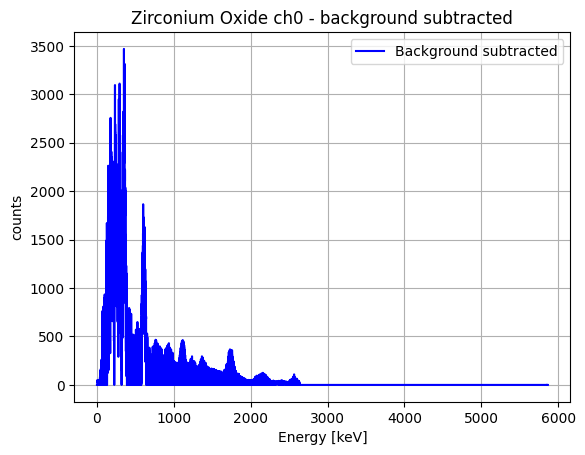

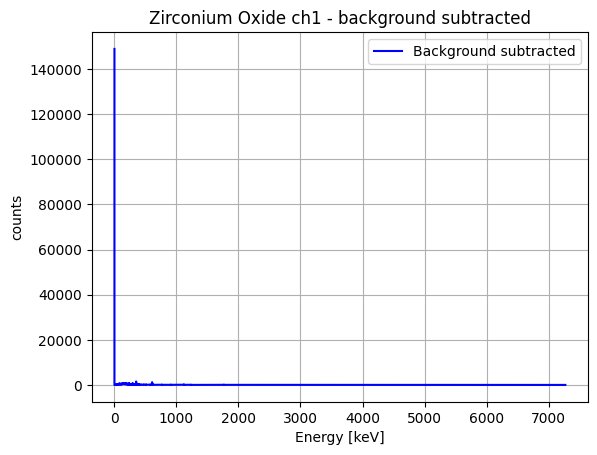

In [36]:
bin_zirconio_ch0_calib, hist_zirconio_ch0_calib = ben.background(zirconio_ch0_calib, fondo3_ch0_calib, None, 'Energy [keV]', 'counts', 'Zirconium Oxide ch0 - background subtracted')
bin_zirconio_ch1_calib, hist_zirconio_ch1_calib = ben.background(zirconio_ch1_calib, fondo3_ch1_calib, None, 'Energy [keV]', 'counts', 'Zirconium Oxide ch1 - background subtracted')


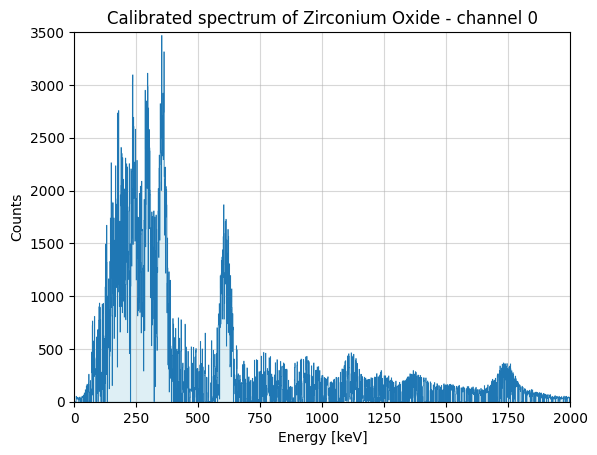

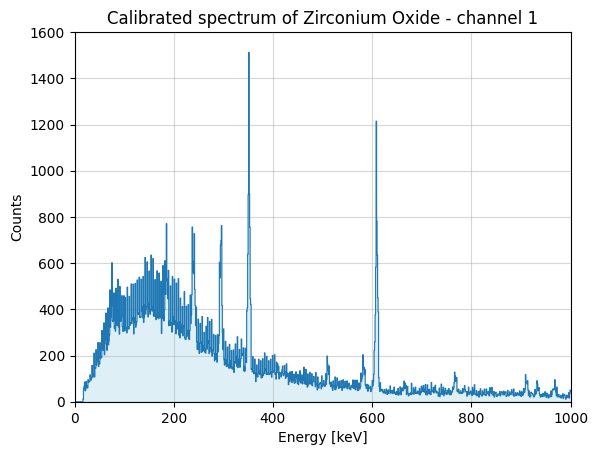

In [37]:
# Plot for Zirconium Oxide - Channel 0
plt.step(bin_zirconio_ch0_calib, hist_zirconio_ch0_calib, linewidth=0.5, where='mid')
plt.fill_between(bin_zirconio_ch0_calib, hist_zirconio_ch0_calib, step='mid', color='lightblue', alpha=0.4)
plt.xlim(0, 2000)
plt.ylim(0, 3500)
plt.grid(alpha=0.5)
plt.title('Calibrated spectrum of Zirconium Oxide - channel 0')
plt.xlabel('Energy [keV]')
plt.ylabel('Counts')
#plt.savefig('grafici/samples/zirconio_ch0.pdf')
plt.show()

# Plot for Zirconium Oxide - Channel 1
plt.step(bin_zirconio_ch1_calib, hist_zirconio_ch1_calib, linewidth=0.8, where='mid')
plt.fill_between(bin_zirconio_ch1_calib, hist_zirconio_ch1_calib, step='mid', color='lightblue', alpha=0.4)
plt.xlim(0, 1000)
plt.ylim(0, 1600)
plt.grid(alpha=0.5)
plt.title('Calibrated spectrum of Zirconium Oxide - channel 1')
plt.xlabel('Energy [keV]')
plt.ylabel('Counts')
#plt.savefig('grafici/samples/zirconio_ch1.pdf')
plt.show()



------------- Zirconio ch0 -----------------
Peak 1
Peak 2
Ampiezza = 85073.65338061415 ± 1215.8176716056284
Media = 273.2130881783164 ± 0.06856549364035815
Sigma = 4.570491553309549 ± 0.0835870120859904
Chi-quadro = 104.02428825879782
Chi-quadro ridotto = 8.668690688233152
Integrale dell'istogramma nel range [264.0721050716973, 282.3540712849355] = 81613 ± 285
-----------------------------------------------
Peak 3
Ampiezza = 21343.160149296284 ± 432.3607363236168
Media = 550.2360269592177 ± 0.12834854242925978
Sigma = 6.007492847403818 ± 0.15534233977050915
Chi-quadro = 83.96016645026788
Chi-quadro ridotto = 4.938833320603993
Integrale dell'istogramma nel range [538.2210412644101, 562.2510126540253] = 21131 ± 145
-----------------------------------------------
Peak 4
Ampiezza = 33372.520438386106 ± 264.6230806931575
Media = 774.6628643063365 ± 0.04229063328997056
Sigma = 4.719522098479485 ± 0.04485525592630694
Chi-quadro = 39.73247950915125
Chi-quadro ridotto = 2.337204677008897
Integ

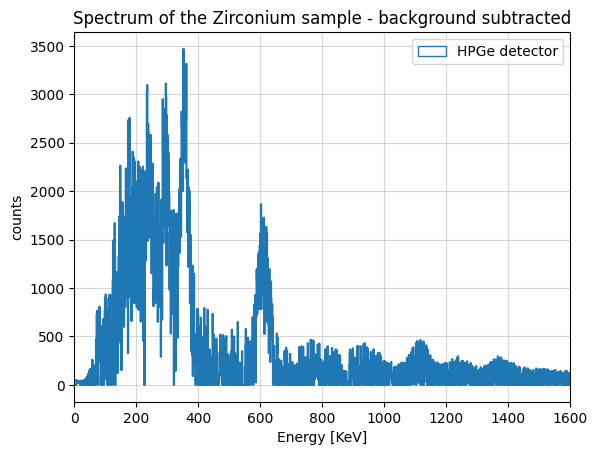

In [38]:
k=2
print(f'------------- Zirconio ch0 -----------------')
print(f'Peak 1')
#zirconio_ch0_peak1 = ben.normal_PLOT(bin_centers=bin_zirconio_ch0_calib, counts=hist_zirconio_ch0_calib, xlabel='Energy [keV]', ylabel='counts', titolo='1st peak of Eu', xmin=82, xmax=95, n=k)
print(f'Peak 2')
zirconio_ch0_peak2 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='2nd peak of Eu', xmin=265, xmax=280, n=k)
print(f'Peak 3')
zirconio_ch0_peak3 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='3rd peak of Eu', xmin=540, xmax=560, n=k)
print(f'Peak 4')
zirconio_ch0_peak4 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='4th peak of Eu', xmin=765, xmax=785, n=k)
print(f'Peak 5')
zirconio_ch0_peak5 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='5th peak of Eu', xmin=917, xmax=932, n=k)
print(f'Peak 6')
zirconio_ch0_peak6 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='6th peak of Eu', xmin=990, xmax=1007, n=k)

print(f'------------- Zirconio ch0 -----------------')


plt.step(bin_zirconio_ch0_calib, hist_zirconio_ch0_calib)
custom_patches = [
    Patch(edgecolor='#1f77b4', facecolor='none', linewidth=1, label='HPGe detector'),
]
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.title('Spectrum of the Zirconium sample - background subtracted')
plt.legend(handles=custom_patches)
plt.xlim(0, 1600)
plt.grid(alpha=0.5)
#plt.savefig('grafici/efficiency_calibration/Eu_backsubtracted.pdf')
plt.show()

### Potassium Chloride

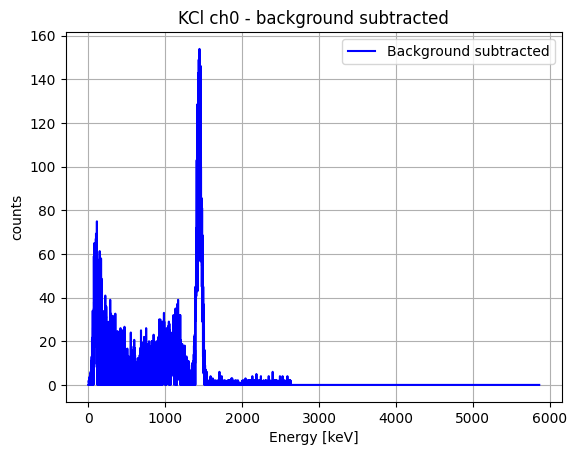

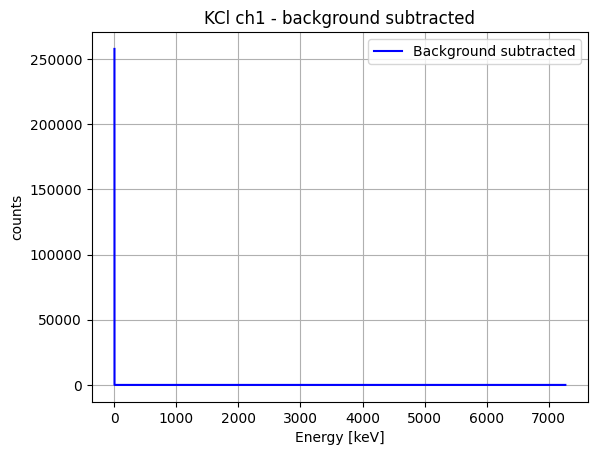

In [39]:
bin_potassio_ch0_calib, hist_potassio_ch0_calib = ben.background(potassio_ch0_calib, fondo3_ch0_calib, None, 'Energy [keV]', 'counts', 'KCl ch0 - background subtracted')
bin_potassio_ch1_calib, hist_potassio_ch1_calib = ben.background(potassio_ch1_calib, fondo3_ch1_calib, None, 'Energy [keV]', 'counts', 'KCl ch1 - background subtracted')

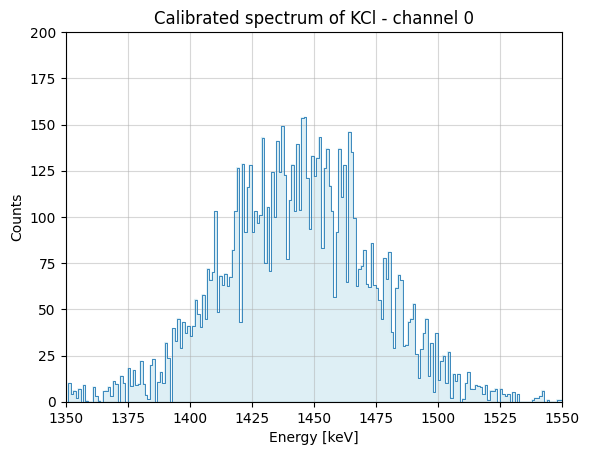

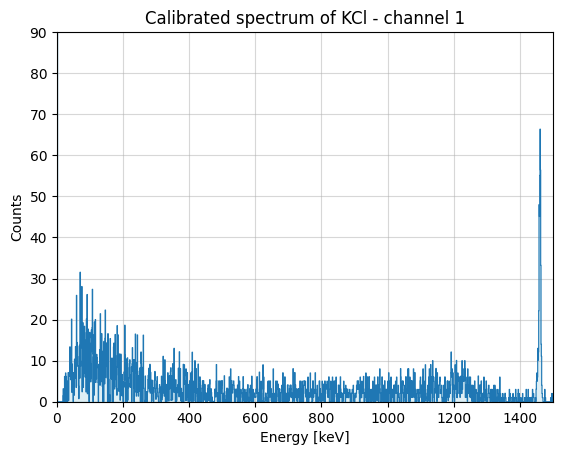

In [40]:
# Plot for Potassium Chloride - Channel 0
plt.step(bin_potassio_ch0_calib, hist_potassio_ch0_calib, linewidth=0.6, where='mid')
plt.fill_between(bin_potassio_ch0_calib, hist_potassio_ch0_calib, step='mid', color='lightblue', alpha=0.4)
plt.xlim(1350, 1550)
plt.ylim(0, 200)
plt.grid(alpha=0.5)
plt.title('Calibrated spectrum of KCl - channel 0')
plt.xlabel('Energy [keV]')
plt.ylabel('Counts')
plt.show()

# Plot for Potassium Chloride - Channel 1
plt.step(bin_potassio_ch1_calib, hist_potassio_ch1_calib, linewidth=0.8, where='mid')
plt.fill_between(bin_potassio_ch1_calib, hist_potassio_ch1_calib, step='mid', color='lightblue', alpha=0.4)
plt.xlim(0, 1500)
plt.ylim(0, 90)
plt.grid(alpha=0.5)
plt.title('Calibrated spectrum of KCl - channel 1')
plt.xlabel('Energy [keV]')
plt.ylabel('Counts')
plt.show()

In [41]:
k=2
print(f'------------- Potassium Chloride ch0 -----------------')
print(f'Peak 1')
potassio_ch0_peak1 = ben.normal_PLOT(bin_centers=bin_potassio_ch0_calib, counts=hist_potassio_ch0_calib, xlabel='Energy [keV]', ylabel='counts', titolo='', xmin=1420, xmax=1480, n=k)

print(f'------------- Potassium Chloride ch1 -----------------')
print(f'Peak 1')
potassio_ch1_peak1 = ben.normal_PLOT(bin_centers=bin_potassio_ch1_calib, counts=hist_potassio_ch1_calib, xlabel='Energy [keV]', ylabel='counts', titolo='', xmin=1460, xmax=1465, n=k)

------------- Potassium Chloride ch0 -----------------
Peak 1
Ampiezza = 8781.757638650748 ± 712.0413693409987
Media = 1444.3994735057513 ± 1.7711476353631093
Sigma = 28.1929062271009 ± 2.854475198888084
Chi-quadro = 370.54202367475426
Chi-quadro ridotto = 6.500737257451829
Integrale dell'istogramma nel range [1388.0136610515494, 1500.7852859599532] = 8643 ± 92
-----------------------------------------------
------------- Potassium Chloride ch1 -----------------
Peak 1
Ampiezza = 279.73668781475624 ± 1.0275931491606185
Media = 1461.5298794863045 ± 0.006609539562158349
Sigma = 1.678744435554414 ± 0.0075068509382738855
Chi-quadro = 0.0023599248120640486
Chi-quadro ridotto = 0.0011799624060320243
Integrale dell'istogramma nel range [1458.1723906151956, 1464.8873683574134] = 318 ± 17
-----------------------------------------------


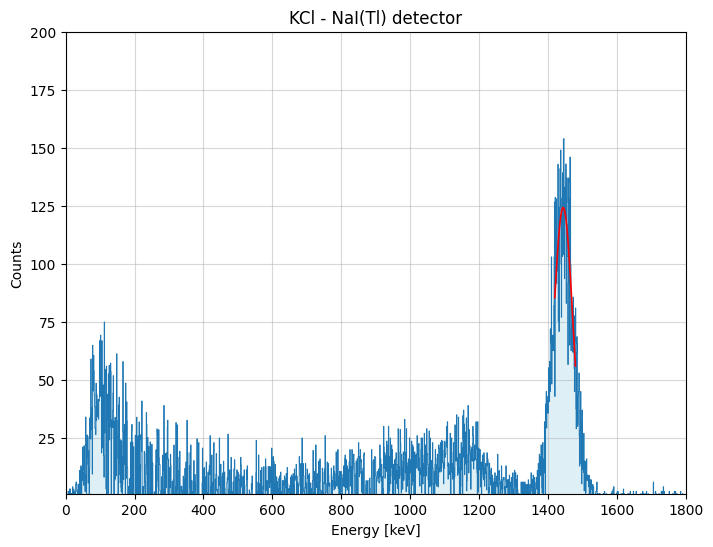

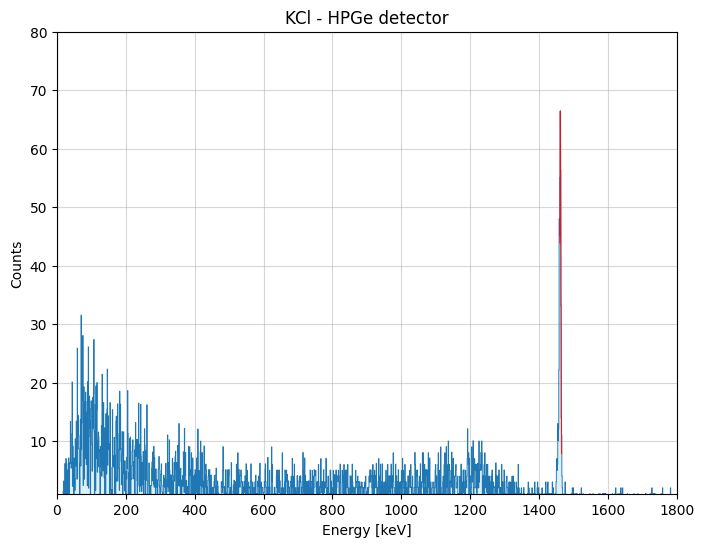

In [42]:
plot_peak1_ch0 = potassio_ch0_peak1[5]
plot_peak1_ch1 = potassio_ch1_peak1[5]

plt.figure(figsize=(8, 6))  # Larghezza = 16, Altezza = 9
plt.step(plot_peak1_ch0[0], plot_peak1_ch0[1], linewidth=0.6, where='mid') #plot dei dati
plt.fill_between(plot_peak1_ch0[0], plot_peak1_ch0[1], step='mid', color='lightblue', alpha=0.4)
plt.plot(plot_peak1_ch0[2], plot_peak1_ch0[3], color='red', linewidth=1.2, alpha=1) #fit 1 picco
plt.xlim(0, 1800)
plt.ylim(1, 200)
plt.grid(alpha=0.5)
#plt.yscale('log')
plt.title('KCl - NaI(Tl) detector')
plt.xlabel('Energy [keV]')
plt.ylabel('Counts')
plt.savefig("KClSpectrum_NaI.pdf", format='pdf', dpi=500, bbox_inches='tight')
plt.show()

plt.figure(figsize=(8, 6))  # Larghezza = 16, Altezza = 9
plt.step(plot_peak1_ch1[0], plot_peak1_ch1[1], linewidth=0.6, where='mid') #plot dei dati
plt.fill_between(plot_peak1_ch1[0], plot_peak1_ch1[1], step='mid', color='lightblue', alpha=0.4)
plt.plot(plot_peak1_ch1[2], plot_peak1_ch1[3], color='red', linewidth=0.8, alpha=0.8) #fit 1 picco
plt.xlim(0, 1800)
plt.ylim(1, 80)
plt.grid(alpha=0.5)
#plt.yscale('log')
plt.title('KCl - HPGe detector')
plt.xlabel('Energy [keV]')
plt.ylabel('Counts')
plt.savefig("KClSpectrum_HPGe.pdf", format='pdf', dpi=500, bbox_inches='tight')
plt.show()

### Porcini mushrooms

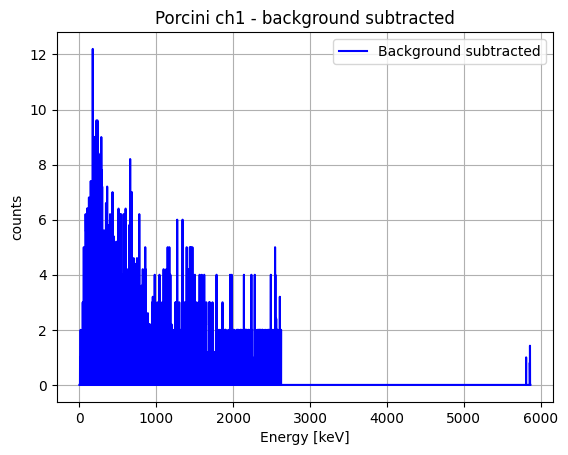

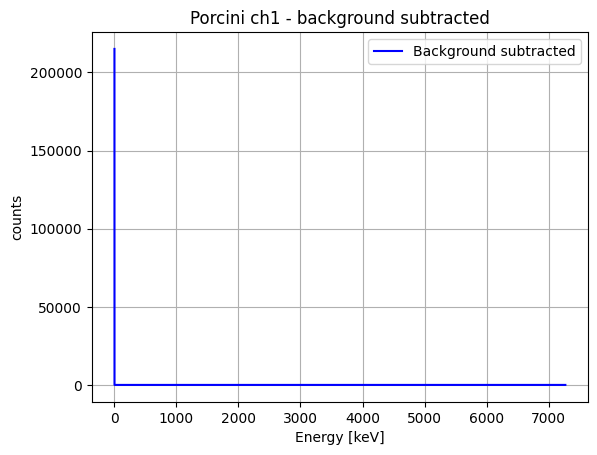

In [43]:
bin_porcini_ch0_calib, hist_porcini_ch0_calib = ben.background(porcini_ch0_calib, fondo3_ch0_calib, None, 'Energy [keV]', 'counts', 'Porcini ch1 - background subtracted')
bin_porcini_ch1_calib, hist_porcini_ch1_calib = ben.background(porcini_ch1_calib, fondo3_ch1_calib, None, 'Energy [keV]', 'counts', 'Porcini ch1 - background subtracted')

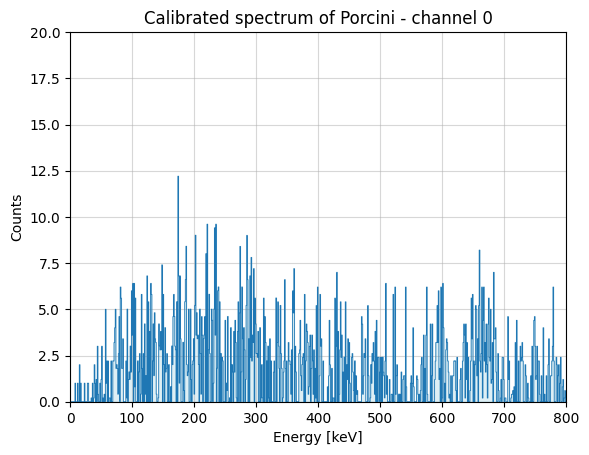

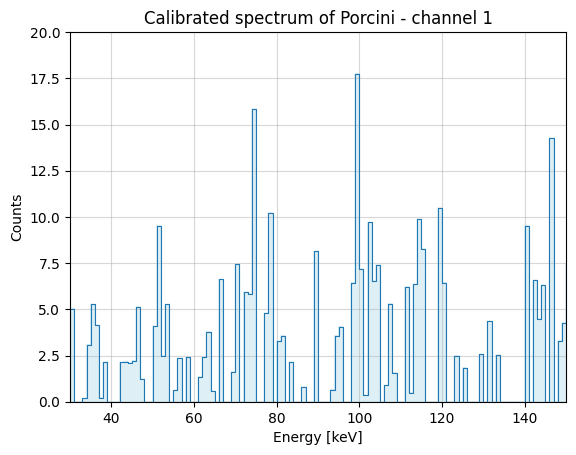

In [44]:
# Plot for Porcini Mushrooms - Channel 0
plt.step(bin_porcini_ch0_calib, hist_porcini_ch0_calib, linewidth=0.6, where='mid')
plt.fill_between(bin_porcini_ch0_calib, hist_porcini_ch0_calib, step='mid', color='lightblue', alpha=0.4)
plt.xlim(0, 800)
plt.ylim(0, 20)
plt.grid(alpha=0.5)
plt.title('Calibrated spectrum of Porcini - channel 0')
plt.xlabel('Energy [keV]')
plt.ylabel('Counts')
plt.show()

# Plot for Porcini Mushrooms - Channel 1
plt.step(bin_porcini_ch1_calib, hist_porcini_ch1_calib, linewidth=0.8, where='mid')
plt.fill_between(bin_porcini_ch1_calib, hist_porcini_ch1_calib, step='mid', color='lightblue', alpha=0.4)
plt.xlim(30, 150)
plt.ylim(0, 20)
plt.grid(alpha=0.5)
plt.title('Calibrated spectrum of Porcini - channel 1')
plt.xlabel('Energy [keV]')
plt.ylabel('Counts')
plt.show()

------------- Porcini ch0 -----------------
Peak 1
Ampiezza = 62.39486357029049 ± 13.36740915599874
Media = 78.33186214364395 ± 1.923754285412251
Sigma = 8.21938126288717 ± 2.193862941815761
Chi-quadro = inf
Chi-quadro ridotto = inf
Integrale dell'istogramma nel range [61.89309961786961, 94.77062466941828] = 59 ± 7
-----------------------------------------------
------------- Porcini ch1 -----------------
Peak 1
Ampiezza = 20.820177051196325 ± 7.192944554368034
Media = 51.606140901121094 ± 0.4245516858073445
Sigma = 1.0683770617908668 ± 0.4295087879442741
Chi-quadro = inf
Chi-quadro ridotto = inf
Integrale dell'istogramma nel range [49.46938677753936, 53.742895024702825] = 21 ± 4
-----------------------------------------------
Peak 2
Ampiezza = 22.27379980248302 ± 6.698836785724506
Media = 74.2001842770755 ± 0.5976455542942054
Sigma = 0.44988433191165594 ± 0.6577757240220145
Chi-quadro = inf
Chi-quadro ridotto = inf
Integrale dell'istogramma nel range [73.30041561325218, 75.09995294089

c:\Users\Utente\Desktop\uni\MAGISTRALE\ESAMI\laboratory1\lab\gammagit\bened.py:96: RuntimeWarning: divide by zero encountered in divide
  chi_quadro = np.sum(((counts_fit - fit_values) / sigma_counts_fit) ** 2)


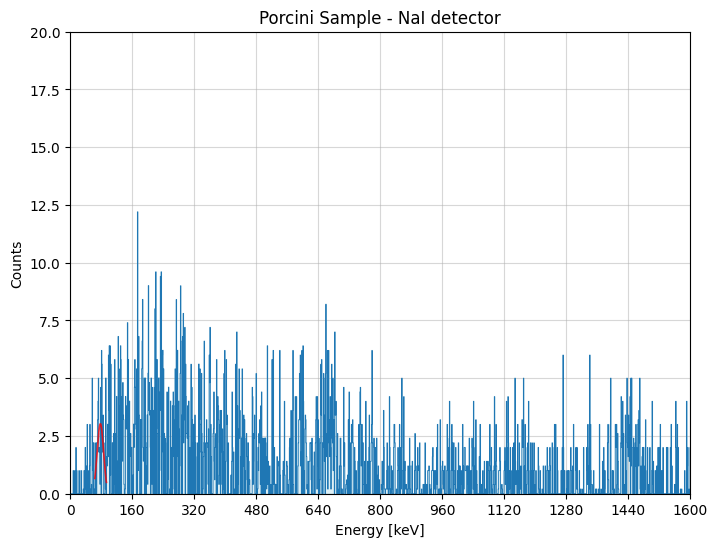

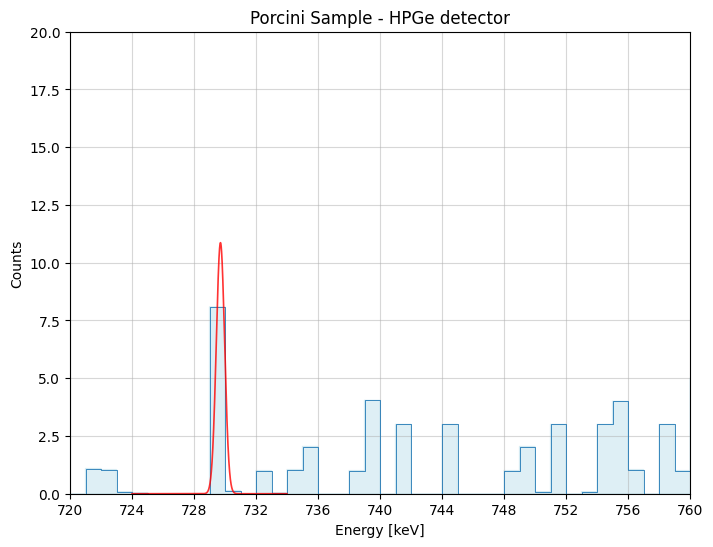

In [45]:
k=2
print(f'------------- Porcini ch0 -----------------')
print(f'Peak 1')
porcini_ch0_peak1 = ben.normal_PLOT(bin_centers=bin_porcini_ch0_calib, counts=hist_porcini_ch0_calib, xlabel='Energy [keV]', ylabel='counts', titolo='', xmin=64, xmax=94, n=k)


print(f'------------- Porcini ch1 -----------------')
print(f'Peak 1')
porcini_ch1_peak1 = ben.normal_PLOT(bin_centers=bin_porcini_ch1_calib, counts=hist_porcini_ch1_calib, xlabel='Energy [keV]', ylabel='counts', titolo='', xmin=48, xmax=54, n=k) 
print(f'Peak 2')
porcini_ch1_peak2 = ben.normal_PLOT(bin_centers=bin_porcini_ch1_calib, counts=hist_porcini_ch1_calib, xlabel='Energy [keV]', ylabel='counts', titolo='', xmin=72, xmax=78, n=k)
print(f'Peak 3')
porcini_ch1_peak3 = ben.normal_PLOT(bin_centers=bin_porcini_ch1_calib, counts=hist_porcini_ch1_calib, xlabel='Energy [keV]', ylabel='counts', titolo='', xmin=96, xmax=102, n=k)
print(f'Peak 4')
porcini_ch1_peak4 = ben.normal_PLOT(bin_centers=bin_porcini_ch1_calib, counts=hist_porcini_ch1_calib, xlabel='Energy [keV]', ylabel='counts', titolo='', xmin=144, xmax=148, n=k)
print(f'Peak 5')
porcini_ch1_peak5 = ben.normal_PLOT(bin_centers=bin_porcini_ch1_calib, counts=hist_porcini_ch1_calib, xlabel='Energy [keV]', ylabel='counts', titolo='', xmin=326, xmax=330, n=k)
print(f'Peak 6')
porcini_ch1_peak6 = ben.normal_PLOT(bin_centers=bin_porcini_ch1_calib, counts=hist_porcini_ch1_calib, xlabel='Energy [keV]', ylabel='counts', titolo='', xmin=724, xmax=734, n=k)

plot_peak1_ch0 = porcini_ch0_peak1[5]


plot_peak1_ch1 = porcini_ch1_peak1[5]
plot_peak2_ch1 = porcini_ch1_peak2[5]
plot_peak3_ch1 = porcini_ch1_peak3[5]
plot_peak4_ch1 = porcini_ch1_peak4[5]
plot_peak5_ch1 = porcini_ch1_peak5[5]
plot_peak6_ch1 = porcini_ch1_peak6[5]

xmin_ch0, xmax_ch0 = 0, 1600

# Plot for Autunite - Channel 0
def set_xticks(xmin, xmax, num_ticks=15):
    step = (xmax - xmin) / num_ticks  # Calculate step size
    return np.arange(xmin, xmax + step, step)

xticks = set_xticks(xmin_ch0, xmax_ch0, num_ticks=10)

plt.figure(figsize=(8, 6))  # Larghezza = 16, Altezza = 9
plt.step(plot_peak1_ch0[0], plot_peak1_ch0[1], linewidth=0.6, where='mid') #plot dei dati
plt.fill_between(plot_peak1_ch0[0], plot_peak1_ch0[1], step='mid', color='lightblue', alpha=0.4)
plt.plot(plot_peak1_ch0[2], plot_peak1_ch0[3], color='red', linewidth=1.2, alpha=0.8) #fit 1 picco

plt.xlim(xmin_ch0, xmax_ch0)
plt.xticks(xticks)
plt.ylim(0, 20)
plt.grid(alpha=0.5)
#plt.yscale('log')
plt.title('Porcini Sample - NaI detector')
plt.xlabel('Energy [keV]')
plt.ylabel('Counts')
#plt.savefig("AutuniteSpectrum_NaI.pdf", format='pdf', dpi=500, bbox_inches='tight')
plt.show()

##############################################################################################################

xmin_ch1, xmax_ch1 = 720, 760
xticks = set_xticks(xmin_ch1, xmax_ch1, num_ticks=10)

# Plot for Autunite - Channel 1
plt.figure(figsize=(8, 6))  # Larghezza = 16, Altezza = 9
plt.step(plot_peak1_ch1[0], plot_peak1_ch1[1], linewidth=0.6, where='mid') #plot dei dati
plt.fill_between(plot_peak1_ch1[0], plot_peak1_ch1[1], step='mid', color='lightblue', alpha=0.4)

plt.plot(plot_peak1_ch1[2], plot_peak1_ch1[3], color='red', linewidth=1.2, alpha=0.8) #fit 1 picco
plt.plot(plot_peak2_ch1[2], plot_peak2_ch1[3], color='red', linewidth=1.2, alpha=0.8) #fit 2 picco
plt.plot(plot_peak3_ch1[2], plot_peak3_ch1[3], color='red', linewidth=1.2, alpha=0.8) #fit 3 picco
plt.plot(plot_peak4_ch1[2], plot_peak4_ch1[3], color='red', linewidth=1.2, alpha=0.8) #fit 4 picco
plt.plot(plot_peak5_ch1[2], plot_peak5_ch1[3], color='red', linewidth=1.2, alpha=0.8) #fit 5 picco
plt.plot(plot_peak6_ch1[2], plot_peak6_ch1[3], color='red', linewidth=1.2, alpha=0.8) #fit 6 picco

plt.xlim(xmin_ch1, xmax_ch1)
plt.xticks(xticks)

plt.ylim(0, 20)
plt.grid(alpha=0.5)
#plt.yscale('log')
plt.title('Porcini Sample - HPGe detector')
plt.xlabel('Energy [keV]')
plt.ylabel('Counts')
#plt.savefig("AutuniteSpectrum_HPGe.pdf", format='pdf', dpi=500, bbox_inches='tight')
plt.show()

### Autunite

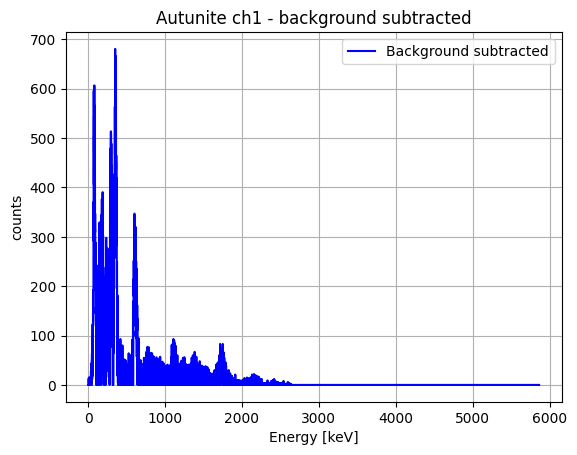

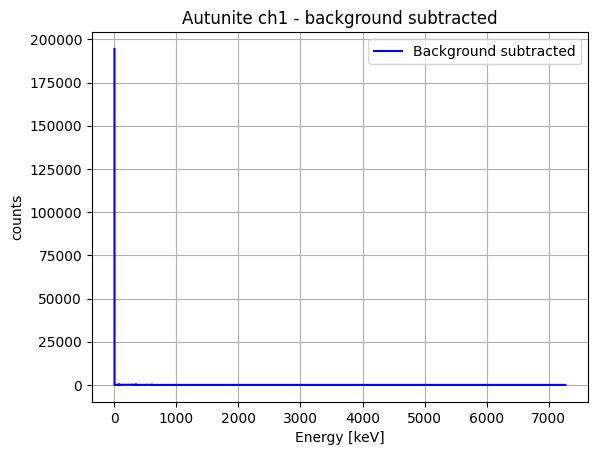

In [46]:
bin_autunite_ch0_calib, hist_autunite_ch0_calib = ben.background(autunite_ch0_calib, fondo3_ch0_calib, None, 'Energy [keV]', 'counts', 'Autunite ch1 - background subtracted')
bin_autunite_ch1_calib, hist_autunite_ch1_calib = ben.background(autunite_ch1_calib, fondo3_ch1_calib, None, 'Energy [keV]', 'counts', 'Autunite ch1 - background subtracted')

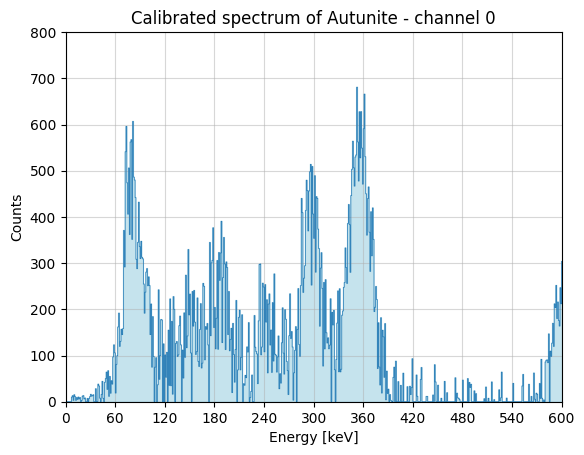

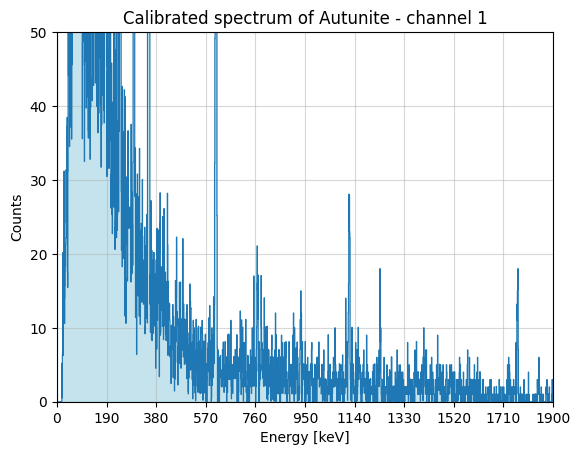

In [47]:
# Plot for Autunite - Channel 1
def set_xticks(xmin, xmax, num_ticks=15):
    step = (xmax - xmin) / num_ticks  # Calculate step size
    return np.arange(xmin, xmax + step, step)


xmin_ch0, xmax_ch0 = 0, 600
xticks = set_xticks(xmin_ch0, xmax_ch0, num_ticks=10)

# Plot for Autunite - Channel 0
plt.step(bin_autunite_ch0_calib, hist_autunite_ch0_calib, linewidth=0.5, where='mid')
plt.fill_between(bin_autunite_ch0_calib, hist_autunite_ch0_calib, step='mid', color='lightblue', alpha=0.7)
plt.xlim(xmin_ch0, xmax_ch0)
plt.xticks(xticks)
plt.ylim(0, 800)
plt.grid(alpha=0.5)
plt.title('Calibrated spectrum of Autunite - channel 0')
plt.xlabel('Energy [keV]')
plt.ylabel('Counts')
plt.show()


xmin_ch1, xmax_ch1 = 0, 1900
xticks = set_xticks(xmin_ch1, xmax_ch1, num_ticks=10)


plt.step(bin_autunite_ch1_calib, hist_autunite_ch1_calib, linewidth=0.8, where='mid')
plt.fill_between(bin_autunite_ch1_calib, hist_autunite_ch1_calib, step='mid', color='lightblue', alpha=0.7)
plt.xlim(xmin_ch1, xmax_ch1)
plt.xticks(xticks)
plt.ylim(0, 50)
plt.grid(alpha=0.5)
plt.title('Calibrated spectrum of Autunite - channel 1')
plt.xlabel('Energy [keV]')
plt.ylabel('Counts')
plt.show()

------------- Autunite ch0 -----------------
Peak 1
Ampiezza = 12825.637103537767 ± 943.8755697994269
Media = 80.48467512342108 ± 0.7427184123288274
Sigma = 10.231467792183322 ± 0.9806331682690779
Chi-quadro = 745.4319347782342
Chi-quadro ridotto = 27.60859017697164
Integrale dell'istogramma nel range [60.02173953905444, 100.94761070778773] = 13065 ± 114
-----------------------------------------------
Peak 2
Ampiezza = 10019.830622976082 ± 9729.87792753234
Media = 186.67370129387356 ± 12.133127796134973
Sigma = 15.606050477784258 ± 14.617689917541057
Chi-quadro = inf
Chi-quadro ridotto = inf
Integrale dell'istogramma nel range [155.46160033830506, 217.88580224944207] = 10735 ± 103
-----------------------------------------------
Peak 3
Ampiezza = 4372.719654717708 ± 950.6733181494268
Media = 239.862188714703 ± 1.4826243083487889
Sigma = 8.387554221581048 ± 2.38432163004779
Chi-quadro = 932.2957530956241
Chi-quadro ridotto = 54.84092665268378
Integrale dell'istogramma nel range [223.0870

c:\Users\Utente\Desktop\uni\MAGISTRALE\ESAMI\laboratory1\lab\gammagit\bened.py:85: OptimizeWarning: Covariance of the parameters could not be estimated
  params, cov_matrix = curve_fit(gaussian, bin_centers_fit, counts_fit, p0=initial_guess)
c:\Users\Utente\Desktop\uni\MAGISTRALE\ESAMI\laboratory1\lab\gammagit\bened.py:98: RuntimeWarning: divide by zero encountered in scalar divide
  reduced_chi_quadro = chi_quadro / degrees_of_freedom


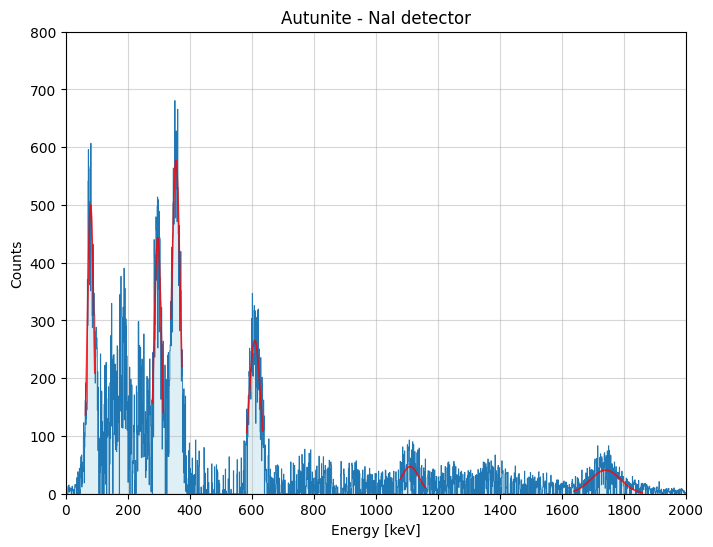

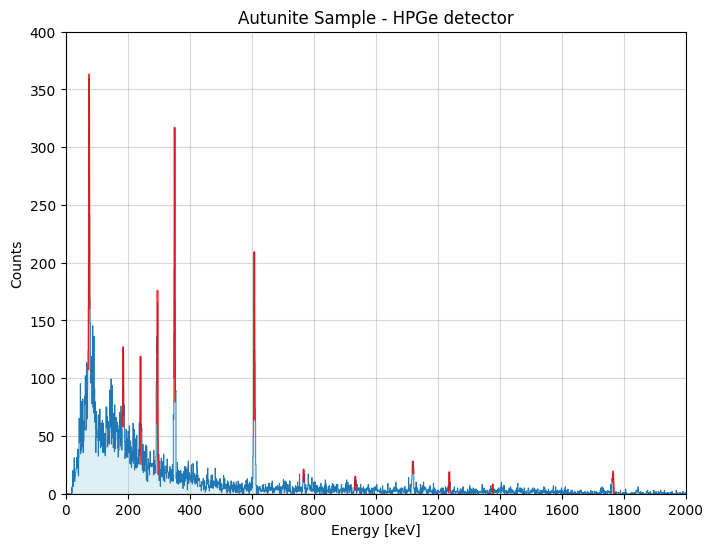

In [48]:
k=2
print(f'------------- Autunite ch0 -----------------')
print(f'Peak 1')
autunite_ch0_peak1 = ben.normal_PLOT(bin_centers=bin_autunite_ch0_calib, counts=hist_autunite_ch0_calib, xlabel='Energy [keV]', ylabel='counts', titolo='', xmin=64, xmax=94, n=k)
print(f'Peak 2')
autunite_ch0_peak2 = ben.normal_PLOT(bin_centers=bin_autunite_ch0_calib, counts=hist_autunite_ch0_calib, xlabel='Energy [keV]', ylabel='counts', titolo='', xmin=170, xmax=190, n=k)
print(f'Peak 3')
autunite_ch0_peak3 = ben.normal_PLOT(bin_centers=bin_autunite_ch0_calib, counts=hist_autunite_ch0_calib, xlabel='Energy [keV]', ylabel='counts', titolo='', xmin=230, xmax=250, n=k)
print(f'Peak 4')
autunite_ch0_peak4 = ben.normal_PLOT(bin_centers=bin_autunite_ch0_calib, counts=hist_autunite_ch0_calib, xlabel='Energy [keV]', ylabel='counts', titolo='', xmin=280, xmax=315, n=k)
print(f'Peak 5')
autunite_ch0_peak5 = ben.normal_PLOT(bin_centers=bin_autunite_ch0_calib, counts=hist_autunite_ch0_calib, xlabel='Energy [keV]', ylabel='counts', titolo='', xmin=340, xmax=375, n=k)
print(f'Peak 6')
autunite_ch0_peak6 = ben.normal_PLOT(bin_centers=bin_autunite_ch0_calib, counts=hist_autunite_ch0_calib, xlabel='Energy [keV]', ylabel='counts', titolo='', xmin=584, xmax=636, n=k)
print(f'Peak 7')
autunite_ch0_peak7 = ben.normal_PLOT(bin_centers=bin_autunite_ch0_calib, counts=hist_autunite_ch0_calib, xlabel='Energy [keV]', ylabel='counts', titolo='', xmin=1080, xmax=1160, n=k)
print(f'Peak 8')
autunite_ch0_peak8 = ben.normal_PLOT(bin_centers=bin_autunite_ch0_calib, counts=hist_autunite_ch0_calib, xlabel='Energy [keV]', ylabel='counts', titolo='', xmin=1640, xmax=1860, n=k)



print(f'------------- Autunite ch1 -----------------')
print(f'Peak 1')
autunite_ch1_peak1 = ben.normal_PLOT(bin_centers=bin_autunite_ch1_calib, counts=hist_autunite_ch1_calib, xlabel='Energy [keV]', ylabel='counts', titolo='', xmin=74, xmax=77, n=k) #74 77
print(f'Peak 2')
autunite_ch1_peak2 = ben.normal_PLOT(bin_centers=bin_autunite_ch1_calib, counts=hist_autunite_ch1_calib, xlabel='Energy [keV]', ylabel='counts', titolo='', xmin=184, xmax=187, n=k) #184 187
print(f'Peak 3')
autunite_ch1_peak3 = ben.normal_PLOT(bin_centers=bin_autunite_ch1_calib, counts=hist_autunite_ch1_calib, xlabel='Energy [keV]', ylabel='counts', titolo='', xmin=240, xmax=243, n=k) #240 243
print(f'Peak 4')
autunite_ch1_peak4 = ben.normal_PLOT(bin_centers=bin_autunite_ch1_calib, counts=hist_autunite_ch1_calib, xlabel='Energy [keV]', ylabel='counts', titolo='', xmin=295, xmax=298, n=k) #295 298
print(f'Peak 5')
autunite_ch1_peak5 = ben.normal_PLOT(bin_centers=bin_autunite_ch1_calib, counts=hist_autunite_ch1_calib, xlabel='Energy [keV]', ylabel='counts', titolo='', xmin=350, xmax=353, n=k) #350 353
print(f'Peak 6')
autunite_ch1_peak6 = ben.normal_PLOT(bin_centers=bin_autunite_ch1_calib, counts=hist_autunite_ch1_calib, xlabel='Energy [keV]', ylabel='counts', titolo='', xmin=607, xmax=610, n=k) #607 610
print(f'Peak 7')
autunite_ch1_peak7 = ben.normal_PLOT(bin_centers=bin_autunite_ch1_calib, counts=hist_autunite_ch1_calib, xlabel='Energy [keV]', ylabel='counts', titolo='', xmin=766, xmax=769, n=k) #766 769
print(f'Peak 8')
autunite_ch1_peak8 = ben.normal_PLOT(bin_centers=bin_autunite_ch1_calib, counts=hist_autunite_ch1_calib, xlabel='Energy [keV]', ylabel='counts', titolo='', xmin=933, xmax=936, n=k) #933 936
print(f'Peak 9')
autunite_ch1_peak9 = ben.normal_PLOT(bin_centers=bin_autunite_ch1_calib, counts=hist_autunite_ch1_calib, xlabel='Energy [keV]', ylabel='counts', titolo='', xmin=1119, xmax=1122, n=k) #1119 1122
print(f'Peak 10')
autunite_ch1_peak10 = ben.normal_PLOT(bin_centers=bin_autunite_ch1_calib, counts=hist_autunite_ch1_calib, xlabel='Energy [keV]', ylabel='counts', titolo='', xmin=1236, xmax=1239, n=k) #1236 1239
print(f'Peak 11')
autunite_ch1_peak11 = ben.normal_PLOT(bin_centers=bin_autunite_ch1_calib, counts=hist_autunite_ch1_calib, xlabel='Energy [keV]', ylabel='counts', titolo='', xmin=1376, xmax=1380, n=k) #1376 1380
print(f'Peak 12')
autunite_ch1_peak12 = ben.normal_PLOT(bin_centers=bin_autunite_ch1_calib, counts=hist_autunite_ch1_calib, xlabel='Energy [keV]', ylabel='counts', titolo='', xmin=1765, xmax=1769, n=k) #1765 1769


plot_peak1_ch0 = autunite_ch0_peak1[5]
plot_peak4_ch0 = autunite_ch0_peak4[5]
plot_peak5_ch0 = autunite_ch0_peak5[5]
plot_peak6_ch0 = autunite_ch0_peak6[5]
plot_peak7_ch0 = autunite_ch0_peak7[5]
plot_peak8_ch0 = autunite_ch0_peak8[5]



plot_peak1_ch1 = autunite_ch1_peak1[5]
plot_peak2_ch1 = autunite_ch1_peak2[5]
plot_peak3_ch1 = autunite_ch1_peak3[5]
plot_peak4_ch1 = autunite_ch1_peak4[5]
plot_peak5_ch1 = autunite_ch1_peak5[5]
plot_peak6_ch1 = autunite_ch1_peak6[5]
plot_peak7_ch1 = autunite_ch1_peak7[5]
plot_peak8_ch1 = autunite_ch1_peak8[5]
plot_peak9_ch1 = autunite_ch1_peak9[5]
plot_peak10_ch1 = autunite_ch1_peak10[5]
plot_peak11_ch1 = autunite_ch1_peak11[5]
plot_peak12_ch1 = autunite_ch1_peak12[5]

xmin_ch0, xmax_ch0 = 0, 2000

# Plot for Autunite - Channel 0
def set_xticks(xmin, xmax, num_ticks=15):
    step = (xmax - xmin) / num_ticks  # Calculate step size
    return np.arange(xmin, xmax + step, step)

xticks = set_xticks(xmin_ch0, xmax_ch0, num_ticks=10)

plt.figure(figsize=(8, 6))  # Larghezza = 16, Altezza = 9
plt.step(plot_peak1_ch0[0], plot_peak1_ch0[1], linewidth=0.6, where='mid') #plot dei dati
plt.fill_between(plot_peak1_ch0[0], plot_peak1_ch0[1], step='mid', color='lightblue', alpha=0.4)
plt.plot(plot_peak1_ch0[2], plot_peak1_ch0[3], color='red', linewidth=1.2, alpha=0.8) #fit 1 picco
plt.plot(plot_peak4_ch0[2], plot_peak4_ch0[3], color='red', linewidth=1.2, alpha=0.8) #fit 4 picco
plt.plot(plot_peak5_ch0[2], plot_peak5_ch0[3], color='red', linewidth=1.2, alpha=0.8) #fit 5 picco
plt.plot(plot_peak6_ch0[2], plot_peak6_ch0[3], color='red', linewidth=1.2, alpha=0.8) #fit 6 picco
plt.plot(plot_peak7_ch0[2], plot_peak7_ch0[3], color='red', linewidth=1.2, alpha=0.8) #fit 7 picco
plt.plot(plot_peak8_ch0[2], plot_peak8_ch0[3], color='red', linewidth=1.2, alpha=0.8) #fit 8 picco


plt.xlim(xmin_ch0, xmax_ch0)
plt.xticks(xticks)
plt.ylim(0, 800)
plt.grid(alpha=0.5)
#plt.yscale('log')
plt.title('Autunite - NaI detector')
plt.xlabel('Energy [keV]')
plt.ylabel('Counts')
plt.savefig("AutuniteSpectrum_NaI.pdf", format='pdf', dpi=500, bbox_inches='tight')
plt.show()

##############################################################################################################

xmin_ch1, xmax_ch1 = 0, 2000
xticks = set_xticks(xmin_ch1, xmax_ch1, num_ticks=10)

# Plot for Autunite - Channel 1
plt.figure(figsize=(8, 6))  # Larghezza = 16, Altezza = 9
plt.step(plot_peak1_ch1[0], plot_peak1_ch1[1], linewidth=0.6, where='mid') #plot dei dati
plt.fill_between(plot_peak1_ch1[0], plot_peak1_ch1[1], step='mid', color='lightblue', alpha=0.4)

plt.plot(plot_peak1_ch1[2], plot_peak1_ch1[3], color='red', linewidth=1.2, alpha=0.8) #fit 1 picco
plt.plot(plot_peak2_ch1[2], plot_peak2_ch1[3], color='red', linewidth=1.2, alpha=0.8) #fit 2 picco
plt.plot(plot_peak3_ch1[2], plot_peak3_ch1[3], color='red', linewidth=1.2, alpha=0.8) #fit 3 picco
plt.plot(plot_peak4_ch1[2], plot_peak4_ch1[3], color='red', linewidth=1.2, alpha=0.8) #fit 4 picco
plt.plot(plot_peak5_ch1[2], plot_peak5_ch1[3], color='red', linewidth=1.2, alpha=0.8) #fit 5 picco
plt.plot(plot_peak6_ch1[2], plot_peak6_ch1[3], color='red', linewidth=1.2, alpha=0.8) #fit 6 picco
plt.plot(plot_peak7_ch1[2], plot_peak7_ch1[3], color='red', linewidth=1.2, alpha=0.8) #fit 7 picco
plt.plot(plot_peak8_ch1[2], plot_peak8_ch1[3], color='red', linewidth=1.2, alpha=0.8) #fit 8 picco
plt.plot(plot_peak9_ch1[2], plot_peak9_ch1[3], color='red', linewidth=1.2, alpha=0.8) #fit 9 picco
plt.plot(plot_peak10_ch1[2], plot_peak10_ch1[3], color='red', linewidth=1.2, alpha=0.8) #fit 10 picco
plt.plot(plot_peak11_ch1[2], plot_peak11_ch1[3], color='red', linewidth=1.2, alpha=0.8) #fit 11 picco
plt.plot(plot_peak12_ch1[2], plot_peak12_ch1[3], color='red', linewidth=1.2, alpha=0.8) #fit 12 picco


plt.xlim(xmin_ch1, xmax_ch1)
plt.xticks(xticks)

plt.ylim(0, 400)
plt.grid(alpha=0.5)
#plt.yscale('log')
plt.title('Autunite Sample - HPGe detector')
plt.xlabel('Energy [keV]')
plt.ylabel('Counts')
plt.savefig("AutuniteSpectrum_HPGe.pdf", format='pdf', dpi=500, bbox_inches='tight')
plt.show()

### Enea water

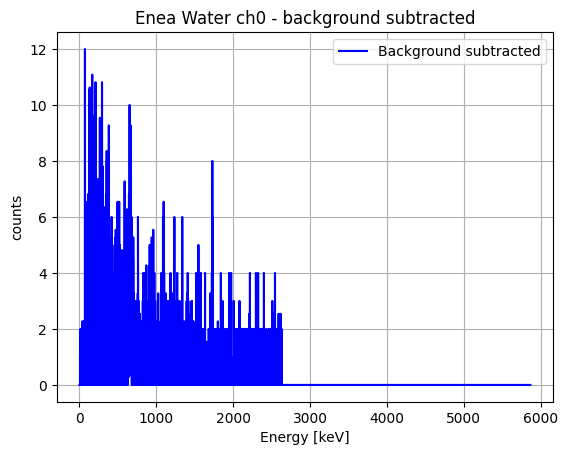

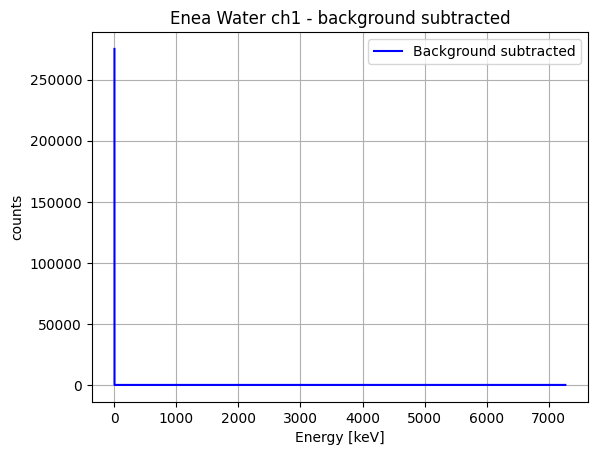

In [49]:
bin_enea_ch0_calib, hist_enea_ch0_calib = ben.background(enea_ch0_calib, fondo3_ch0_calib, None, 'Energy [keV]', 'counts', 'Enea Water ch0 - background subtracted')
bin_enea_ch1_calib, hist_enea_ch1_calib = ben.background(enea_ch1_calib, fondo3_ch1_calib, None, 'Energy [keV]', 'counts', 'Enea Water ch1 - background subtracted')

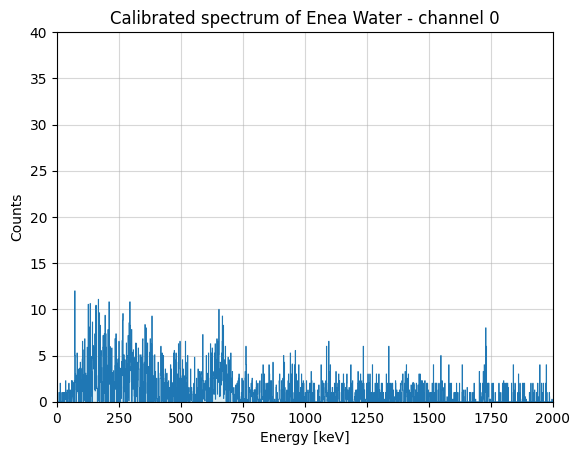

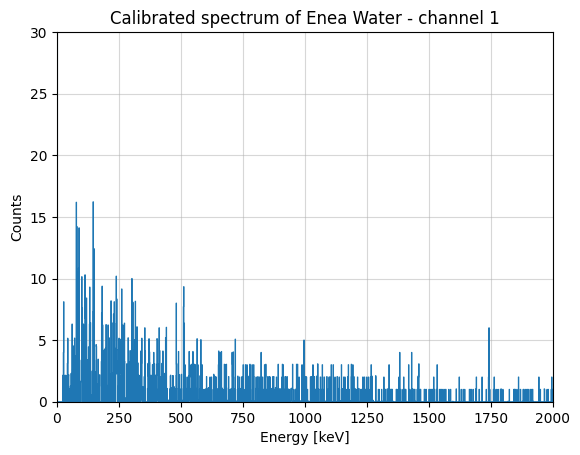

In [50]:
# Plot for Enea Water - Channel 0
plt.step(bin_enea_ch0_calib, hist_enea_ch0_calib, linewidth=0.6, where='mid')
plt.fill_between(bin_enea_ch0_calib, hist_enea_ch0_calib, step='mid', color='lightblue', alpha=0.4)
plt.xlim(0, 2000)
plt.ylim(0, 40)
plt.grid(alpha=0.5)
plt.title('Calibrated spectrum of Enea Water - channel 0')
plt.xlabel('Energy [keV]')
plt.ylabel('Counts')
plt.show()

# Plot for Enea Water - Channel 1
plt.step(bin_enea_ch1_calib, hist_enea_ch1_calib, linewidth=0.8, where='mid')
plt.fill_between(bin_enea_ch1_calib, hist_enea_ch1_calib, step='mid', color='lightblue', alpha=0.4)
plt.xlim(0, 2000)
plt.ylim(0, 30)
plt.grid(alpha=0.5)
plt.title('Calibrated spectrum of Enea Water - channel 1')
plt.xlabel('Energy [keV]')
plt.ylabel('Counts')
plt.show()

### Cement

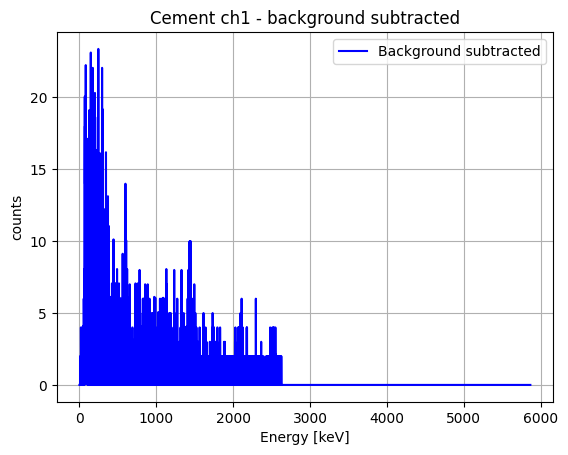

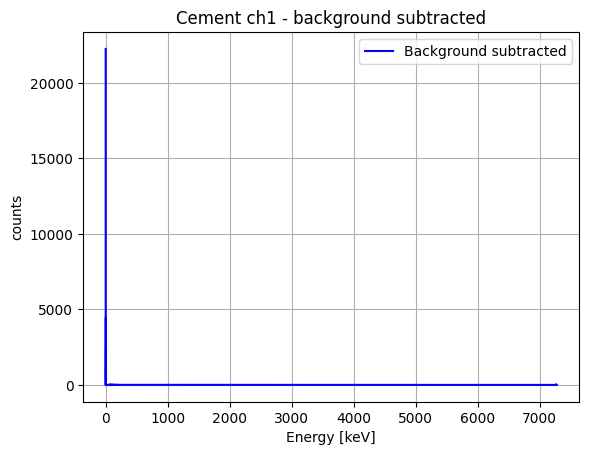

In [51]:
bin_cemento_ch0_calib, hist_cemento_ch0_calib = ben.background(cemento_ch0_calib, fondo3_ch0_calib, None, 'Energy [keV]', 'counts', 'Cement ch1 - background subtracted')
bin_cemento_ch1_calib, hist_cemento_ch1_calib = ben.background(cemento_ch1_calib, fondo3_ch1_calib, None, 'Energy [keV]', 'counts', 'Cement ch1 - background subtracted')

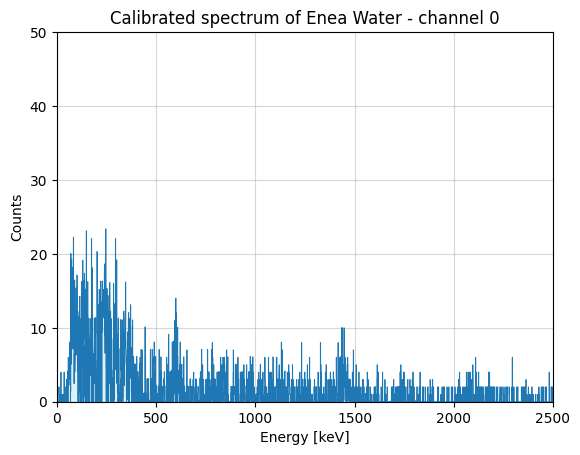

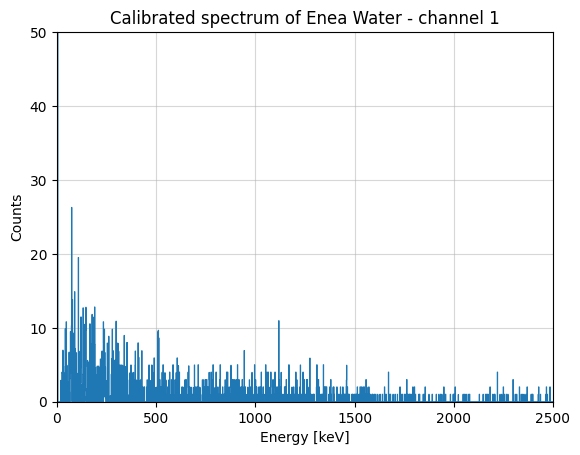

In [52]:
# Plot for Cement - Channel 0
plt.step(bin_cemento_ch0_calib, hist_cemento_ch0_calib, linewidth=0.6, where='mid')
plt.fill_between(bin_cemento_ch0_calib, hist_cemento_ch0_calib, step='mid', color='lightblue', alpha=0.4)
plt.xlim(0, 2500)
plt.ylim(0, 50)
plt.grid(alpha=0.5)
plt.title('Calibrated spectrum of Enea Water - channel 0')
plt.xlabel('Energy [keV]')
plt.ylabel('Counts')
plt.show()

# Plot for Cement - Channel 1
plt.step(bin_cemento_ch1_calib, hist_cemento_ch1_calib, linewidth=0.8, where='mid')
plt.fill_between(bin_cemento_ch1_calib, hist_cemento_ch1_calib, step='mid', color='lightblue', alpha=0.4)
plt.xlim(0, 2500)
plt.ylim(0, 50)
plt.grid(alpha=0.5)
plt.title('Calibrated spectrum of Enea Water - channel 1')
plt.xlabel('Energy [keV]')
plt.ylabel('Counts')
plt.show()

## RADON COUNTING

### calibrazione e rimozione dell'unexposed

In [53]:
exposed_ch0_calib = exposed_ch0*calibrazione_ch0[0]+calibrazione_ch0[1]
exposed_ch1_calib = exposed_ch1*calibrazione_ch1[0]+calibrazione_ch1[1]

unexposed_ch0_calib = unexposed_ch0*calibrazione_ch0[0]+calibrazione_ch0[1]
unexposed_ch1_calib = unexposed_ch1*calibrazione_ch1[0]+calibrazione_ch1[1]

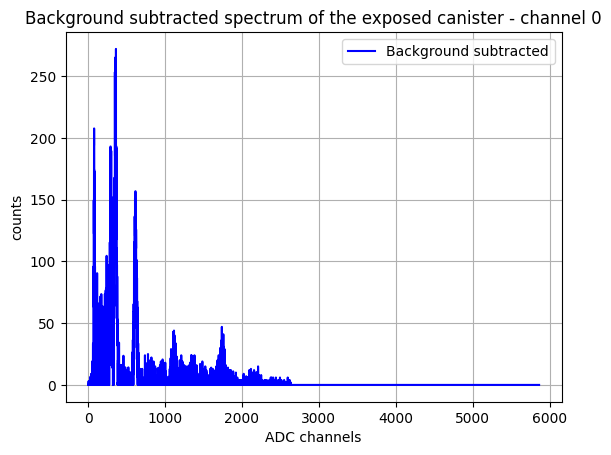

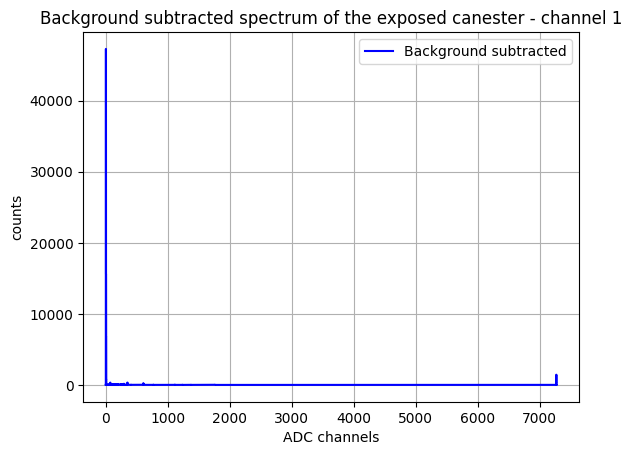

In [54]:
bin_exposed_ch0, hist_exposed_ch0 = ben.background(exposed_ch0_calib, unexposed_ch0_calib, None, xlabel='ADC channels', ylabel='counts', titolo='Background subtracted spectrum of the exposed canister - channel 0')
bin_exposed_ch1, hist_exposed_ch1 = ben.background(exposed_ch1_calib, unexposed_ch1_calib, None, xlabel='ADC channels', ylabel='counts', titolo='Background subtracted spectrum of the exposed canester - channel 1')

### radon counting con HPGE

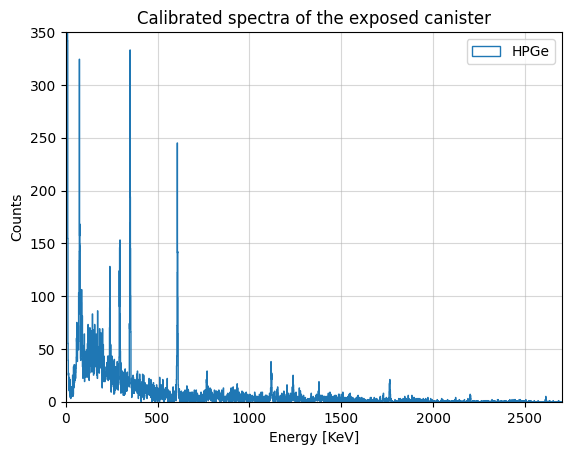

In [55]:
color_ch1 = '#1f77b4'
custom_patches = [
    Patch(edgecolor=color_ch1, linewidth=1, label='HPGe',  facecolor='none')
]
plt.step(bin_exposed_ch1, hist_exposed_ch1, color=color_ch1, label='HPGe', lw=1)
plt.xlabel('Energy [KeV]')
plt.ylabel('Counts')
plt.title('Calibrated spectra of the exposed canister')
# plt.xlim(1730, 1780)
plt.xlim(0, 2700)
plt.ylim(0, 350)
plt.legend(handles=custom_patches)
plt.grid(alpha=0.5)
# plt.yscale('log')  # Se necessario
# plt.savefig('grafici/radon/calibrated_spectra_exposed.pdf')
plt.show()


In [56]:
j=2
print('Peak 1')
exposedch1_peak1 = ben.normal_PLOT(bin_centers=bin_exposed_ch1, counts=hist_exposed_ch1, xmin=73, xmax=78, n=j)
print('Peak 2')
exposedch1_peak2 = ben.normal_PLOT(bin_centers=bin_exposed_ch1, counts=hist_exposed_ch1, xmin=238, xmax=245, n=j)
print('Peak 3')
exposedch1_peak3 = ben.normal_PLOT(bin_centers=bin_exposed_ch1, counts=hist_exposed_ch1, xmin=291, xmax=299, n=j)
print('Peak 4')
exposedch1_peak4 = ben.normal_PLOT(bin_centers=bin_exposed_ch1, counts=hist_exposed_ch1, xmin=348, xmax=356, n=j)
print('Peak 5')
exposedch1_peak5 = ben.normal_PLOT(bin_centers=bin_exposed_ch1, counts=hist_exposed_ch1, xmin=606, xmax=612, n=j)
print('Peak 6')
exposedch1_peak6 = ben.normal_PLOT(bin_centers=bin_exposed_ch1, counts=hist_exposed_ch1, xmin=1115, xmax=1123, n=j)
print('Peak 7')
exposedch1_peak7 = ben.normal_PLOT(bin_centers=bin_exposed_ch1, counts=hist_exposed_ch1, xmin=1234, xmax=1243, n=j)
print('Peak 8')
exposedch1_peak8 = ben.normal_PLOT(bin_centers=bin_exposed_ch1, counts=hist_exposed_ch1, xmin=1761, xmax=1768, n=j)

Peak 1
Ampiezza = 1069.3587591145772 ± 344.541019184425
Media = 75.66269548198608 ± 0.5371978140019865
Sigma = 1.710796193124709 ± 0.7257429548464227
Chi-quadro = 73.6578735555999
Chi-quadro ridotto = 36.82893677779995
Integrale dell'istogramma nel range [72.24110309573666, 79.08428786823549] = 1157 ± 34
-----------------------------------------------
Peak 2
Ampiezza = 521.0820018909302 ± 42.6456746524023
Media = 241.4052807532593 ± 0.1679560938239435
Sigma = 1.857453754694698 ± 0.1874754857320263
Chi-quadro = 8.065905523969914
Chi-quadro ridotto = 2.0164763809924784
Integrale dell'istogramma nel range [237.69037324386989, 245.1201882626487] = 494 ± 22
-----------------------------------------------
Peak 3
Ampiezza = 921.2302538164216 ± 128.85799018618513
Media = 295.04825620117754 ± 0.3659850438075375
Sigma = 2.5747507932192497 ± 0.46780097522443964
Chi-quadro = 36.34344352460309
Chi-quadro ridotto = 7.268688704920618
Integrale dell'istogramma nel range [289.89875461473906, 300.197757

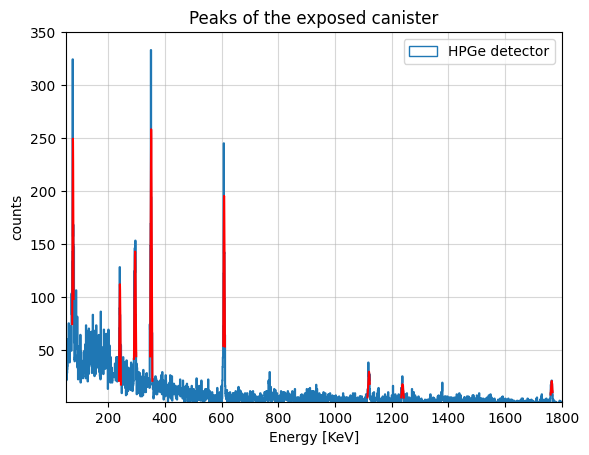

In [57]:
plotRN_peak1 = exposedch1_peak1[5]
plotRN_peak2 = exposedch1_peak2[5]
plotRN_peak3 = exposedch1_peak3[5]
plotRN_peak4 = exposedch1_peak4[5]
plotRN_peak5 = exposedch1_peak5[5]
plotRN_peak6 = exposedch1_peak6[5]
plotRN_peak7 = exposedch1_peak7[5]
plotRN_peak8 = exposedch1_peak8[5]

# plt.figure(figsize=(16*2/3, 9*2/3))  # Larghezza = 16, Altezza = 9
custom_patches = [Patch(edgecolor='#1f77b4', facecolor='none', linewidth=1, label='HPGe detector')]
plt.step(plotRN_peak1[0], plotRN_peak1[1]) #plot dei dati
plt.plot(plotRN_peak1[2], plotRN_peak1[3], color='red') #fit 1 picco
plt.plot(plotRN_peak2[2], plotRN_peak2[3], color='red') #fit 2 picco
plt.plot(plotRN_peak3[2], plotRN_peak3[3], color='red') #fit 3 picco
plt.plot(plotRN_peak4[2], plotRN_peak4[3], color='red') #fit 4 picco
plt.plot(plotRN_peak5[2], plotRN_peak5[3], color='red') #fit 5 picco
plt.plot(plotRN_peak6[2], plotRN_peak6[3], color='red') #fit 6 picco
plt.plot(plotRN_peak7[2], plotRN_peak7[3], color='red') #fit 7 picco
plt.plot(plotRN_peak8[2], plotRN_peak8[3], color='red') #fit 8 picco
plt.xlim(50, 1800)
plt.ylim(1, 350)
plt.grid(alpha=0.5)
# plt.yscale('log')
plt.title('Peaks of the exposed canister')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.legend(handles=custom_patches)
plt.show()

### radon counting per NaI

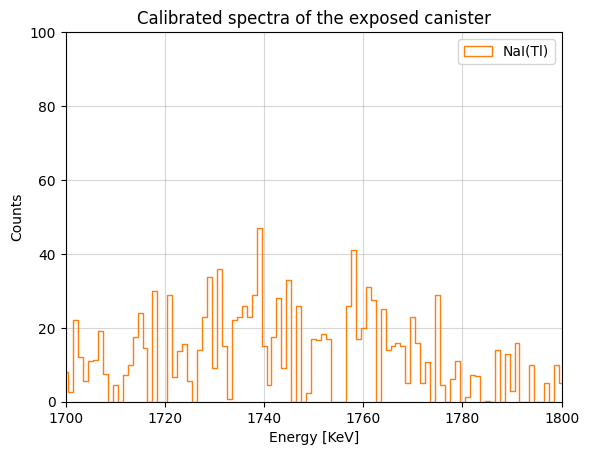

In [58]:
color_ch0 = '#ff7f0e' #'#1f77b4' AZZURRO HPGE
custom_patches = [Patch(edgecolor=color_ch0, linewidth=1, label='NaI(Tl)', facecolor='none')]
plt.step(bin_exposed_ch0, hist_exposed_ch0, color=color_ch0, label='NaI(Tl)', lw=1)
plt.xlabel('Energy [KeV]')
plt.ylabel('Counts')
plt.title('Calibrated spectra of the exposed canister')
plt.xlim(1700, 1800)
# plt.xlim(0, 2400)
plt.ylim(0, 100)
plt.legend(handles=custom_patches)
plt.grid(alpha=0.5)
plt.savefig('grafici/radon/calibrated_spectrum_exposed_NAI.pdf')
plt.show()

In [59]:
j=2
print('Peak 1')
exposedch0_peak1 = ben.normal_PLOT(bin_centers=bin_exposed_ch0, counts=hist_exposed_ch0, xmin=72, xmax=85, n=j)
'''IL PICCO 2 NEL SODIO NON SI VEDE ABBASTANZA BENE DA FITTARLO'''
print('Peak 3')
exposedch0_peak3 = ben.normal_PLOT(bin_centers=bin_exposed_ch0, counts=hist_exposed_ch0, xmin=280, xmax=310, n=j)
print('Peak 4')
exposedch0_peak4 = ben.normal_PLOT(bin_centers=bin_exposed_ch0, counts=hist_exposed_ch0, xmin=335, xmax=380, n=j)
print('Peak 5')
exposedch0_peak5 = ben.normal_PLOT(bin_centers=bin_exposed_ch0, counts=hist_exposed_ch0, xmin=590, xmax=640, n=j)
print('Peak 6')
exposedch0_peak6 = ben.normal_PLOT(bin_centers=bin_exposed_ch0, counts=hist_exposed_ch0, xmin=1095, xmax=1140, x1=1050, x2=1200, n=j)
'''IL PICCO 7 NON SI VEDE ABBASTANZA BENE NEL SODIO DA FITTARLO'''
print('Peak 8')
exposedch0_peak8 = ben.normal_PLOT(bin_centers=bin_exposed_ch0, counts=hist_exposed_ch0, xmin=1700, xmax=1780, n=j)

Peak 1
Ampiezza = 2843.5129578313736 ± 676.551245699381
Media = 77.94958492157797 ± 1.0333232122257978
Sigma = 6.7389022701264425 ± 1.9973643101924041
Chi-quadro = 112.76972045726995
Chi-quadro ridotto = 11.276972045726996
Integrale dell'istogramma nel range [64.47178038132508, 91.42738946183086] = 2610 ± 51
-----------------------------------------------
Peak 3
Ampiezza = 3854.213093061372 ± 519.2762677565295
Media = 295.70544096075577 ± 1.3856868828070283
Sigma = 11.816193780036192 ± 2.09003087576574
Chi-quadro = 558.884392766785
Chi-quadro ridotto = 20.69942195432537
Integrale dell'istogramma nel range [272.07305340068336, 319.33782852082817] = 3817 ± 61
-----------------------------------------------
Peak 4
Ampiezza = 7389.219706714949 ± 411.9040001730555
Media = 357.1639771423633 ± 0.7913941983512163
Sigma = 13.417524424159797 ± 0.9528354230209165
Chi-quadro = 5130.186587411636
Chi-quadro ridotto = 122.14729970027705
Integrale dell'istogramma nel range [330.3289282940437, 383.9990

c:\Users\Utente\Desktop\uni\MAGISTRALE\ESAMI\laboratory1\lab\gammagit\bened.py:96: RuntimeWarning: divide by zero encountered in divide
  chi_quadro = np.sum(((counts_fit - fit_values) / sigma_counts_fit) ** 2)


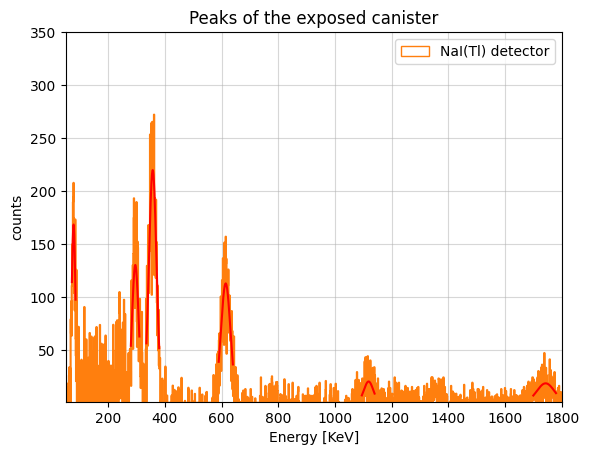

In [60]:
plotRN_peak1ch0 = exposedch0_peak1[5]
plotRN_peak3ch0 = exposedch0_peak3[5]
plotRN_peak4ch0 = exposedch0_peak4[5]
plotRN_peak5ch0 = exposedch0_peak5[5]
plotRN_peak6ch0 = exposedch0_peak6[5]
plotRN_peak8ch0 = exposedch0_peak8[5]

# plt.figure(figsize=(16*2/3, 9*2/3))  # Larghezza = 16, Altezza = 9
custom_patches = [Patch(edgecolor='#ff7f0e', facecolor='none', linewidth=1, label='NaI(Tl) detector')]
plt.step(plotRN_peak1ch0[0], plotRN_peak1ch0[1], color='#ff7f0e') #plot dei dati
plt.plot(plotRN_peak1ch0[2], plotRN_peak1ch0[3], color='red') #fit 1 picco
plt.plot(plotRN_peak3ch0[2], plotRN_peak3ch0[3], color='red') #fit 3 picco
plt.plot(plotRN_peak4ch0[2], plotRN_peak4ch0[3], color='red') #fit 4 picco
plt.plot(plotRN_peak5ch0[2], plotRN_peak5ch0[3], color='red') #fit 5 picco
plt.plot(plotRN_peak6ch0[2], plotRN_peak6ch0[3], color='red') #fit 6 picco
plt.plot(plotRN_peak8ch0[2], plotRN_peak8ch0[3], color='red') #fit 8 picco
plt.xlim(50, 1800)
plt.ylim(1, 350)
plt.grid(alpha=0.5)
# plt.yscale('log')
plt.title('Peaks of the exposed canister')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.legend(handles=custom_patches)
plt.show()